In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
import shutil

In [3]:
df = pd.read_csv('KPROFILES IDOL - DIKETAHUI.csv')

In [4]:
df.head()

,No,Grup,Nama,Instagram,MBTI,I/E,S/N,T/F,P/J
0,1,Weki Meki,Suyeon,suye.on2di,ISTJ,I,S,T,J
1,2,Weki Meki,Elly,_haerimida,ESTP,E,S,T,P
2,3,Weki Meki,Yoojung,dbeoddl__,ISTP,I,S,T,P
3,4,Weki Meki,Doyeon,lafilledhiver_,ISFJ,I,S,F,J
4,5,Weki Meki,Sei,seiric_o,INFJ,I,N,F,J


In [14]:
import instaloader

D:\APP\anaconda3\lib\site-packages\win_unicode_console\__init__.py:31: RuntimeWarning: sys.stdin.encoding == 'cp1252', whereas sys.stdout.encoding == 'UTF-8', readline hook consumer may assume they are the same
  readline_hook.enable(use_pyreadline=use_pyreadline)


In [16]:
L = instaloader.Instaloader(download_pictures=False, download_videos=False, download_video_thumbnails=False, save_metadata=False, compress_json=False)

In [48]:
L.interactive_login('alf.19x')

Enter Instagram password for alf.19x: ········


In [54]:
df_sample = df.head(1)

In [55]:
df_sample

,No,Grup,Nama,Instagram,MBTI,I/E,S/N,T/F,P/J
0,1,Weki Meki,Suyeon,suye.on2di,ISTJ,I,S,T,J


In [13]:
df_sample.loc[df['Instagram'] == 'suye.on2di','MBTI'].values[0]

'ISTJ'

In [20]:
for i in df_sample['Instagram']:
    print(i)

suye.on2di
_haerimida
dbeoddl__
lafilledhiver_
seiric_o


In [58]:
# user_caption = {}
data = pd.DataFrame(columns=['caption', 'user', 'mbti'])
for i in df['Instagram']:
    print('scraping for @' + i)
    Username = i
    profile = instaloader.Profile.from_username(L.context, Username)
    posts = profile.get_posts()
    caption = []
    if os.path.exists('kpop/'+profile.username):
        shutil.rmtree('kpop/'+profile.username)
        os.mkdir('kpop/'+profile.username)
    for index, post in enumerate(posts, 1):
        L.download_post(post, target=f"{profile.username}_{index}")
        shutil.move(f'{profile.username}_{index}', f'kpop/{profile.username}/{profile.username}_{index}')
        for root, dirs, files in os.walk(f'kpop/{profile.username}/{profile.username}_{index}'):
            text = ''
            for file in files:
                if file.endswith('.txt'):
                    with open(os.path.join(root, file), 'r', encoding="utf8") as f:
                        text += f.read()
            caption.append(text)
    df_caption = pd.DataFrame(caption, columns =['caption'])
    df_caption['user'] = i
    df_caption['mbti'] = df.loc[df['Instagram'] == i,'MBTI'].values[0]
#     user_caption[i] = df_caption
    data = pd.concat([data, df_caption])
    data = data.reset_index(drop=True)
    data = data[data['caption']!='']

scraping for @suye.on2di

[📸] 
[제 손이 또...커튼을 망가트리고 말았습니다...] 
[Synergy] 
[해보자고] 
[🌻😁❣️] 
[요수리뚝딱🍳] 
[💚💙] 
[이것도 있지롱 🤪] 
['번지점프를 하다' 작품으로 뮤지컬 데뷔할 수 있게 …] 
[리슨업🖤] 
[마지막이 킬포😏] 
[잘자 키링♥️] 
[내가 두명이라닛] 
[서울페스타🤍] 
[🎨] 
[🧡❤️] 
[위키미키 5주년 아주 많이 축하한드아♥️] 
[무대하기 전에 사진 찍어놔서 다행이다😬] 
[응수씨네☺️] 
[😬] 
[유니콘🤍] 
[🧡♥️] 
[하루종일 키링들이랑 함께했지🧡♥️] 
[너무 멋진 언니,오빠,동생들과 함께하는 뮤지컬 '번지…] 
[동거 잘 듣고 잘 봤나 키링들☺️] 
[요리왕이 되는 그날까지🍳] 


[😬] 
[꿀로그잼 🍯잼이야 😁] 
[🤪] 
[뿌엥] 
[🥰] 
[안녕...내 양모펠트....] 
[꽃과 달⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀…] 
[예쁜 꿈 꿔 키링☁️] 
[스르륵] 
[봄이다 봄! 🌸] 

[박소은-일기] 
[🤪] 
[네컷사진 찍는건 어렵다..] 
[도영선배님 - 아주 조금만 더] 
[썸씽로튼👍] 
[다음엔 내가 너 많이 찍어줄게🥲] 
[류지수-노래보다도 풀버전은 공카에 있지렁😊] 
[정신차려보니...색을 칠하고 있었어요..] 
[분명 전 고기를 먹고있었는데...] 
[🥰] 
[내가 귀찮은가보다.. 🥲] 
[N시의 라이브😎] 
[흐엑🥶] 
[메리크리스마스🎄🎅] 

[🌿] 
[권진아선배님-나의모양] 
[흐힣 너무 귀엽자나😭 뒷태 허락받고 찍었습니다😎] 
[🍓🌕] 
[🌞] 
[더 플레이리스트🎵] 
[🦓] 
[🎤] 
[🟨🟦] 

[오랜만이야 꽃] 
[🌷🌹] 
[내 눈밑의 퍼어얼 ✨] 

[@wkorea] 
[@wkorea] 
[@wkorea] 

[@wkorea] 
[@wkorea @weki_meki] 
[🌟] 
[Who am I] 
[One day 가이드! 너무 행복한 작업이었다고 한다…] 

[펭수를 만나고 수줍어져버렸다] 
[진짜 너무

[ʜᴀᴘᴘʏ ɴᴇᴡ ʏᴇᴀʀ 🌅] 
scraping for @lafilledhiver_
[💛3년만에 다시 열린 리브콘서트💛  저 날 왜 사진을…] 
[@musinsacom  #무신사] 
[울 조카들 운동회🏃‍♀️🎊🤸💦 맨날 묻는 “얘들아 이…] 
[🍽] 
[#PoloRLStyle #PoloIDCollectio…] 
[이렇게나 다양한 모습이 있다니 너무 신비로운걸!] 
[너무나 애정하는 @poloralphlauren 의 ‘…] 
[@ellekorea] 
[@ellekorea  #FERRAGAMOTIMEPIE…] 
[#FERRAGAMOTIMEPIECES] 


[오랜만에 느꼈던 백스테이지에서의 긴장감🫢 짜릿하고 좋…] 
[@mojo.s.phine] 
[캬캬캬 기분 좋구만] 
[이번에도 역시 예쁘네요 예뻐💅🏼] 
[꿈이었나요?…] 
[@dazedkorea] 
[@dazedkorea] 
[@standoil] 
[그림은 못 그려도 색칠놀이는 할 수 있네요!] 
[🚶‍♀️🏃‍♀️🏋️‍♀️] 
[파마는 언제 해보려나 👩🏻‍🦱] 
[@allsaintskorea] 
[식물원에 처음 가봤는데 완전 새로운 세상🌼🌳🌷🌵 내가…] 
[@atheacc_official] 
[너무 즐거웠던 공중부양이었다🧘‍♀️] 
[@bobbibrownkorea] 
[예유갓댓 야미얌댓야미얌 비건컵켘야미~ 🧁🧁🧁🧁] 

[한국이 너무 좋아요] 
[‘PLAYGROUND’ AKIII CLASSIC 22…] 
[🏠🕯🛁📝💟🪞🛋💡🏠] 
[졸린데 노래는 좋고 집에는 가야겠고] 
[나들이를 가요🕺] 
[👀] 
[Powerful Alone, Better Togeth…] 
[@bobbibrownkorea   #광고] 
[좋은 하루 보내세여] 
[🖤] 
[정말정말 행복한 시간….🤲🏽🤎  투각은 저번에 했을 …] 
[딸기 많이 먹을 수 있어서 좋은 계절~ 이지만 너무 추워] 

[진짜 많이 행복했다고 기억할거야!] 
[스물셋 끗] 
[@thestarmagazine 1월호예요♡] 
[@thestarmagazine] 
[비까지 

[날씨가 예술..✨] 
[여기 바다가 아니고 강 이래요…🙈] 
[여기 보이는 이 집이 바로 ‘나홀로 집에’ 에서 집을…] 
[시간여행 시작 합니다💚  in chicago] 
[야경이 예뻤더랬지 🤭] 
[여름이다 이제 🌿😎❤️] 
[야옹이 바지😻 모두 즐거운 주말 보내세요✨] 
[앞니 어디갔어..🤭 #어린이날] 
[🤍] 
[내가 바로 반장😘] 
[these days] 
[첫 베이킹 클래스 🤭😎✨  너무 맛있었다 🥺🤦] 
[안녕 벨리곰💕] 
[😉☺️😶] 
[♡] 

[행복한 설날 보내세요 ♡   (할머니 집마당 에서 🤍…] 
[이제 곧 2월… 🤭🤍 #pillates] 
[안온한 날들 ♡] 
[22💙] 
[웃으면서 보내줘야지 나의 2021년 그리고 스물한살 …] 
[듣자마자 꼭 꼭 커버하고 싶었던 곡 일본어로는 노래를…] 
[2021년 잘 마무리하기 🤍] 
[귀여운 크리스마스 🎄☃️❄️💚❤️✨] 
[서정언니랑 데이트 ♡ #🎄] 
[🎄☃️⛄️❄️✨] 
[내가 좋아하는 것 들 💗 (추위는 싫어..)] 
[오늘 만큼 추웠던 M/V 촬영 🥲☺️❄️ #Siesta] 
[오늘도 고마워요 🖤🤍] 
[🖤🤍] 
[꿈같았던 시에스타 활동 ..💗✨ 이번 앨범도 손길이 …] 
[또 봐 우리 ❤️] 
[@wkorea] 
[더듬이 달고 인기가요🤣✨ #siesta  #wekim…] 
[🌹 @wkorea] 
[커피가 맛있더라구요 🥰 #대기중] 
[나는 나였던 시간 @wkorea] 
[다시 돌아온 뮤직뱅크💙  #Siesta #wekimeki] 
[모자를 써볼까 😛 #🦄] 
[아침 6시 퇴근 🐰✨ #Siesta #wekimeki] 
[인기가요🧡 #Siesta #wekimeki] 
[음악중심🤍 #Siesta #wekimeki] 
[뮤직뱅크💚 #Siesta #wekimeki] 
[추워 🤭] 
[“짧은 낮잠 끝난” #I_AM_ME] 
[I AM ME.  많관부 💓  #wekimeki  #…] 
[연습 연습 연습 🥲] 
[I AM ME  #I_AM_ME] 
[I AM ME  #I_AM_ME] 
[I AM

[ෆ  love this pic !💋 좋아하는 사진  …] 
[🖼🖼🖼  큰일이다 아직 사진이 더 남아있다] 
[구름도 그림같이 #arenahommeplus  #5월…] 
[촬영이지만 정말 기분좋았던 잔디에 눕기🌱] 
[안녕안🌼❀ུ۪] 
[히이 ⠒̫⃝] 
[🪞 쓱싹쓱싹 매지익] 
[#gn #🌙 #sweetdreams #✨] 
[조금 늦은감이 있지만...😃 #hybe #whatdo…] 
[데님데님] 

[봄봄봄 🌸  #광고 #디스커버리운동화 #버킷디워커v2…] 
[존경하던 뿡뿡이 선배님과. #뿌이뿌이 #뿡뿡] 
[#🍔 #🍟 yumyum] 

[💃💃💃  스토리 화질 깨지길래...🙃] 
[체고체고 #👍] 
[눈 펑펑 오던 날 새벽 ☃︎ ❆] 
[✨✨✨  사진첩 사진 탈탈 편집에 영혼 갈갈  그치만…] 
[참 많이 정들었던 어벤걸스의 마지막 방송을 마치고 왔…] 
[BUDDY💙💜🤍] 
[나 아직 0116에 살아 #여자친구 #6주년 #축하했…] 
[It’s finally Christmas🎄 모두모두 …] 
[🤍eve love🤍 크리스마스를 기다리는 이브날의 설…] 
[온종일 기분좋은 향기만 이 곳에 가득해 😌 🌷 ❄️ …] 
[It’s the day before the Chris…] 
[#광고 #디스커버리숏패딩 #디스커버리익스페디션] 
[비하인드 올라간김에 슬그머니 꺼내보는 #엄선생 👩🏻‍…] 
[꽤나 그리운 #눈썰매장 #memoria ☃️] 
[부들부들☁️🤍] 
[*⸌☻ັ⸍*  #광고 #디스커버리플리스 #디스커버리익…] 
[🌝고오마워요] 
[◡̈] 
[오늘은! 사진을 찍었다🌼  #mago #showcha…] 
[좋아하는 내 방   #my_room] 
[9일 언제오나아] 
[바람이 너무행💨😖] 
[두구두구 #온라인콘서트 🌞🌞] 
[INK 😉] 
[모두 따뜻하고 즐거운 연휴 보내세요💚] 
[🍊🧡온 세상 주황을 담아 좡좡좡] 
[라됴 끝나고 열심히 #비즈반지 만들기💍 #그래두완성] 
[전지적 친구시점 🕶 친구가 감성컷찍을거라고 하던거 그…] 
[연습실 즉석 📸by @rlo.

JSON Query to api/v1/users/web_profile_info/?username=minkarin_: 404 Not Found [retrying; skip with ^C]
JSON Query to api/v1/users/web_profile_info/?username=minkarin_: 404 Not Found [retrying; skip with ^C]


ProfileNotExistsException: Profile minkarin_ does not exist.
The most similar profiles are: minkarinkarin, _alice_karin_, karin.elrischile, krn_frlcha, _minkarin_.

## berhenti di minkarin

In [59]:
data.shape

(2812, 3)

In [66]:
import seaborn as sns

<AxesSubplot:xlabel='mbti', ylabel='count'>

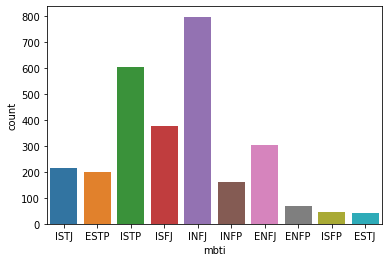

In [67]:
sns.countplot(x='mbti', data=data)

In [65]:
data.to_csv('data1.csv', index=False)

In [62]:
len(data['user'].unique())

18

In [64]:
df.iloc[19:].head()

,No,Grup,Nama,Instagram,MBTI,I/E,S/N,T/F,P/J
19,20,TWICE,Jihyo,_zyozyo,ESFP,E,S,F,P
20,21,TWICE,Nayeon,nayeonyny,ISTP,I,S,T,P
21,22,TWICE,Jeongyeon,jy_piece,ISFP,I,S,F,P
22,23,TWICE,Momo,momo,INFP,I,N,F,P
23,24,TWICE,Sana,m.by__sana,ENFP,E,N,F,P


In [68]:
df.iloc[19:].reset_index(drop=True)

,No,Grup,Nama,Instagram,MBTI,I/E,S/N,T/F,P/J
0,20,TWICE,Jihyo,_zyozyo,ESFP,E,S,F,P
1,21,TWICE,Nayeon,nayeonyny,ISTP,I,S,T,P
2,22,TWICE,Jeongyeon,jy_piece,ISFP,I,S,F,P
3,23,TWICE,Momo,momo,INFP,I,N,F,P
4,24,TWICE,Sana,m.by__sana,ENFP,E,N,F,P
...,...,...,...,...,...,...,...,...,...
127,147,NCT,Haechan,haechanahceah,ENFP,E,N,F,P
128,148,NCT,Jaemin,na.jaemin0813,ISFJ,I,S,F,J
129,149,NCT,Yangyang,yangyang_x2,INTJ,I,N,T,J
130,150,NCT,Shotaro,_shotaroo_,ISFP,I,S,F,P


In [69]:
df=df.iloc[19:].reset_index(drop=True)

## start again

In [70]:
# user_caption = {}
data2 = pd.DataFrame(columns=['caption', 'user', 'mbti'])
for i in df['Instagram']:
    print('scraping for @' + i)
    Username = i
    profile = instaloader.Profile.from_username(L.context, Username)
    posts = profile.get_posts()
    caption = []
    if os.path.exists('kpop/'+profile.username):
        shutil.rmtree('kpop/'+profile.username)
        os.mkdir('kpop/'+profile.username)
    for index, post in enumerate(posts, 1):
        L.download_post(post, target=f"{profile.username}_{index}")
        shutil.move(f'{profile.username}_{index}', f'kpop/{profile.username}/{profile.username}_{index}')
        for root, dirs, files in os.walk(f'kpop/{profile.username}/{profile.username}_{index}'):
            text = ''
            for file in files:
                if file.endswith('.txt'):
                    with open(os.path.join(root, file), 'r', encoding="utf8") as f:
                        text += f.read()
            caption.append(text)
    df_caption = pd.DataFrame(caption, columns =['caption'])
    df_caption['user'] = i
    df_caption['mbti'] = df.loc[df['Instagram'] == i,'MBTI'].values[0]
#     user_caption[i] = df_caption
    data2 = pd.concat([data2, df_caption])
    data2 = data2.reset_index(drop=True)
    data2 = data2[data2['caption']!='']

scraping for @_zyozyo
[🍉] 
[🩰ONCEDAY🩰] 
[昨日めちゃくちゃ楽しかった🥴❣️] 
[📸] 
[GQ golf🌿B하인드2] 
[GQ golf🌿B하인드] 


[가을밤바다날씨굿뜨🌙] 
[대기중🌈🌈] 
[🐻🐻막방🐻🐻수고해써원스트둥] 
[🌼🐱음듕🐱🌼] 
[뮤직뱅크도 클리어💙] 
[오늘 드디어 원스들 만났다🦋 보고싶었어] 
[#광고   🦋  #VersaceGrecaGoddess…] 
[Baby rockstar *ଘ(੭*◕ω◕)੭*ੈ] 
[Queen of hearts🦋] 
[톡댓톡 챌린지까쥐-🫶😉 감사합니당🫶] 
[멋쨍이턱댓턱여전사] 
[🏍💗지효달령] 
[🦋TALK THAT TALK out now🦋] 
[talk that talk 세상에 나오기 1시간 전🔫…] 
[❤️] 
[220826🔫TALK TAHT TALK] 
[0826👾TALK THAT TALK] 
[🧡] 
[20220826🔫💚TALK THAT TALK] 
[Tea time☕️☕️] 
[꿀잼이였던 어제🍯] 
[🥴] 
[久しぶりにMステ! 楽しかった💜💟🦄] 
[in my room💡] 
[celebrate🔮] 
[관광객박죠🧸] 


[얘랑 부산데이뚜😉🤍] 
[부산여행💙] 
[우리샵곰돌이🧸💗] 
[마이티토오르으] 

[💚 #BOTTEGAVENETA #보테가베네타 #팝업방문] 
[나도퇴근🫠] 
[💗] 
[동생이랑 한강데이뚜🤍] 

[골린이의 하루⛳️] 
[날씨zyo아] 
[🤍드디어 공개되었군] 
[❤️] 
[in NY🍫] 
[콘서트가 끄읏나고🦋] 
[🍊] 
[Hi ONCE🍕] 

scraping for @nayeonyny
[今日日本で初めてのファンミーティングみなさんと楽しい時間を…] 
[@dahhyunnee 연둡 🥛] 
[🌹 #tommy] 
[@ellekorea @louisvuitton] 
[🧐] 
[🐰🧁🎀] 
[🎂 고마오 ,, 히이 🎂] 
[🦋🐬🌎💦💙 @biotherm.kr #비오템 #리페어파…] 
[#광고  👟🎀🐰 @louisvuitton] 
[@tommyjeans] 
[@tommyjeans] 
[

[내 소즁한핫팩] 
[귀엽다귀엽다아아😆😆 #Converse x JWAnde…] 
[행복했던 LaRouge🌹] 
[샤랄랄라~~] 
[La Rouge🌹] 
[수영이 양말을 잘못 신고 왔다.. 미안..🤓] 
[얼마 안남았다 떨린다 히히  11/23 ,24  La…] 
[고마워요 언니😆😆👍🦄 @ireneisgoodlabel…] 
[따뜻🔥🔥@moncler] 
[따뜻하게 입어요~~🔥] 
[추워지고있꾼..!] 
[하이이이잉이] 
[😝#Gucci1955horsebit] 
[할로윈이네유...조커 아직 안봤는데😭] 
[뚜비] 
[lovely🌷🌹 #marieclaireKorea#끌로에로] 
[어느날📸] 
[스위스😆] 



[공룡🦖] 
[추워졌다으다으 ㅠㅠ] 
[하잇!!!] 

[😶] 

[#marieclairekorea] 
[#Gucci] 
[#Gucci] 
[🤓] 
[힣 예리미가 찍어준거] 
[📸] 
[🤟😆🤟] 
[@marieclairekorea] 
[필름이 헛돌아서 하나도 안찍히고있었답니다😃🤪] 
[완두콩머글랭????] 
[꺄~~~] 
[😆😆😆😃] 
[#inLOVEwithSWITZERLAND #스위스와사…] 
[밥 기다려요 🍚 #inLOVEwithSWITZERLA…] 
[야무지게 놀았쥬?? #inLOVEwithSWITZER…] 
[#inLOVEwithSWITZERLAND #스위스와사…] 
[예쁜사진이 나오길 기대하며#inLOVEwithSWIT…] 
[아름다운곳#inLOVEwithSWITZERLAND #…] 
[덩실덩실~ #inLOVEwithSWITZERLAND …] 
[뜽와니랑 나 2] 
[뜽와니랑 나  #marieclairekorea] 
[😆😆😆😆] 
[#marieclairekorea] 
[헤헿ㅎ] 
[😆] 
[😃] 
[Photo by wendy😘] 
[빼꼼👀] 
[#컨버스#원스타한별] 
[><#컨버스#원스타한별] 
[우리 수영이 청춘이다⭐️ ㅋㅋ생일축하해❤️ 자카르타에…] 

[조심해에에에] 
[📸찰콰당 @converse_kr] 
[안냥~~@converse_kr] 
[@

[내서탈2🖤] 

[🖤] 
[☺️] 
[내서탈🌹❤️] 
[🌹] 
[❤️] 
[🖤] 
[🖤@gq_korea] 
[@espoir_makeup 🖤] 
[#프로테일러비실크 🖤] 
[#espoirbesilk] 
[😘] 
[🌹] 
[너무조으다❤️ @ellekorea  @michaelk…] 
[💚헿⭐️] 
[💚] 
[💚] 
[❤️] 

[💚] 
[ㅋ] 
[아가💛] 
[뀰!💛] 
[예쁜언니들❤️ @hyunnyvely 📸 @sopial…] 
[이걸 왜 들고있는지는 나도 잘 모르겠다😁] 
[#노웨어쉬폰매트 #걸  @espoir_makeup] 
[저도 #에스쁘아 너무 좋아요😭💛😘] 
[촬영할때마다 격한 반응😭 덕분에 항상 신이 납니다😘 …] 
[💛💛💛] 
[#말린노랑 💛] 
[💛@espoir_makeup] 



[하루하루 너무 걱정이 됩니다ㅜ 밖에 나갈때는 마스크를…] 



[New York FAM🤍 @hyunnyvely  @j…] 

[💚] 
[😄] 
[예뽀❤️] 
[예뿌다❤️ #JOYxMICHAELKORS] 
[#JOYxMICHAELKORS @michaelkors…] 
[💚 #JOYxMICHAELKORS] 

[😌] 
[😊] 
[🤚] 
[Lolo: "Hi! You're in NY now?"…] 
[Wating for @lolozouai 🤭😭❤️] 
[기받는중🤚] 
[저는 아베다만 써요🤭❤️ @avedakr] 
[🖤] 
[미니미니🤍 @michaelkors] 
[Thank you for inviting me at …] 
[젤예뻐❤️#씨씨백 #마이클코어스] 
[@michaelkors 😘] 
[See you soon #michaelkors ❤️] 
[😊] 
[New york!🤩 @michaelkors] 
[🥰] 
[💙💙💙💙💙] 
[바다가들려😆] 
[🤍💙❤️] 
[안녕🤚] 
[맑음💙] 
[여기가어디게☁️] 
[😆] 
[하양기요미☁️ @bottegaveneta] 


[📸] 

[😆💜] 
[❤️💜] 
[ฅ(•ㅅ•❀)ฅ💜] 
[(/ =ω=)/💜] 
[ฅ^•ﻌ•^ฅ💜] 
[❤️ @hyu

[Healthy new year 🤍] 

[Merry Christmas eve] 
[#Psycho] 
[Psycho is out now link in bio…] 
[Today 6PM #PSYCHO] 
[모두가 웃는 빛이났던 그런 밤이었습니다 #제2회빛이나…] 
[🎞] 
[추억 필름🤍] 

[🎧🎤🖤🤍] 

[당신들의 이름이 내 행동으로 인해서 누군가에게 또 나…] 
[You got me feeling like a psy…] 

[#PSYCHO] 

[#PSYCHO] 
[PSYCHO] 
[The Reve festival finale] 
[#PSYCHO] 
[PSYCHO is coming to you] 
[멋있고 사랑스러웠습니다 악뮤 ♥️] 
[예리크리스마스] 
[STAY IN THE MAGIC EVEN AFTER …] 
[💜💜💜] 
[🎞] 
[트리랑] 
[🖤] 
[스물하나 스물둘 사이 나] 
[Enjoy your dinner!] 
[12월은 한 달이 다 크리스마스 🖤] 
[나도 미리 메리크리스마스] 
[Soon] 
[너의 온기가 되어줄게🎧 들으시고 따뜻한 겨울 되세요 🖤] 
[너의 온기가 되어줄게 ☃️ 작사, 작곡에 함께할 수 …] 
[디디딛디올 ♥️] 
[@dior] 
[나랑 디올 💖] 
[Thank u La rouge] 
[La rouge moments✨✨✨] 
[🌹🌹🌹] 
[La rouge moments] 
[나의 주말을 잘 부탁합니다🌹] 
[보는 날만 기다리고 있습니다 러비들🖤] 

[늦었지만 사랑하는 언니 생일 축하🎂 언제나 사랑합니다…] 


[La Rouge] 
[Have you ever seen La Rouge?🖤🖤🖤] 
[Hi there] 

[감기때문에 고생하는 둘🤧] 
[올 해 첫 온수 매트 킨 날 헤헤 따뜻하다☺️이번 겨…] 
[Im stuck in traffic] 
[👽] 
[🎃🎃🎃] 
[햅삐 할로윈] 


[밥 먹기 전 잔뜩 설렘] 

[🖤🖤🖤] 

[We love film] 
[나!빠!] 
[🍁] 

[🎞] 
[on a clear dar

[#광고 #CartierParty #JusteunClo…] 

[bye London] 
[#ad #BurberrySpringSummer20 #…] 
[I'm here 🙋🏻‍♀️] 
[#ad 추석에도 이쁜 사진 감사드려요😖 모두 즐거운 …] 

[💃🏻] 

[🌿] 
[photo by chu🍒] 
[드디어 올린다  태그 했으니까 또 찍어죠 🥰] 
[rainy day☔️] 
[#ad Thank you Yeti for always…] 
[#ad the Hungry Yeti AR featur…] 
[#광고 @dior] 
[#광고 RED] 
[#광고 @dior 💚] 
[#blinks 곧 만나요❣️] 
[내 마음을 받아랏 #blinks 🖤] 
[블링크 우리랑 3주년 축하해요 ❣️ 앞으로도 서로 아…] 
[can you see us? 👀] 
[🖤] 
[🍊] 
[I''m here 🙋🏻‍♀️] 
[in the ocean] 
[and 🌈] 
[and beautiful sunrise] 
[beautiful sky] 
[See you next time, Hua 🐬] 
[Hi bodyguard 🌊] 
[take me away 🛥🥑] 
[☀️sunflower🌻] 
[나무야💚] 
[그림같은 배경과 맛있는 파인애플 🍍] 

[oh! so sunny💛] 
[☀️] 
[aloha🌴] 

[bye bye 🦋] 
[#blackpink2019worldtour#inyou…] 
[#bangkok#seeutomorrow 💞] 
[#jisooisgood 🦄] 
[리사야 또 훠궈 먹고싶오😻] 
[📷 lili] 
[#BLINK#❣️ 보고싶었고 봐서 좋았고 얼른 또 봐…] 
[#BLACKPINK2019WORLDTOURwithKI…] 
[#blackpink2019worldtourwithki…] 
[📷 @lalalalisa_m] 
[#tb] 



[#blackpink2019worldtourwithki…] 

[📷 @roses_are_rosie] 
[#blackpink2019worldtourwithki…] 
[ji

[TY❣️to all our Blinks out the…] 
[Jen wearing Gen] 
[Cloud on point] 
[☁️] 
[Love] 
[이 비니 찜 @adidasoriginals] 
[이 패딩 찜 @adidasoriginals] 
[엄마는 나의 영원한 포토그래퍼] 
[By @kimheejune 🖤🖤🖤] 
[이거슨희준실장님갬성🖤] 
[@chanelofficial] 
[Me & Chanel & Vogue] 
[Took a little trip to this ad…] 

[우연히 찾아간 카페] 
[Paris is always a good idea] 
[뾰로통] 
[Matchy] 
[Feeling classy and fabulous] 
[🖤] 
[Photo by mummy 📸] 


[Flowers may brighten your day] 
[Me and my unnis in Paris. @so…] 
[@kimheejune @maeng666 @iseony…] 
[Love you @virginieviard.] 
[Merci @chanelofficial] 
[Omw] 
[Shot by the one and only @kim…] 
[@chanelofficial] 
[Pre shoot] 
[avant @chanelofficial] 
[They look cool @blackpinkoffi…] 

[Wandering around] 
[Meow] 
[Goodmorning Paris] 
[Cozy in red 🌹#handbagCHANEL19] 
[Mon amour, je viens à paris #…] 
[Thank you for the lovely phot…] 


[The fun side of me] 
[The soft side of me @chanelof…] 
[블랙핑크 첫 팬미팅 [챕터 1] 🖤💕 행복했습니다 감…] 
[In film too] 
[Just for fun with @kimheejune] 
[Coco chanel] 
[@ellekorea @ch

[yes sir i’m one of a kind] 
[mood] 

[blurry and i like it] 
[kawai everything] 
[#ninicam] 
[rain.] 
[before stage] 

[잔머리] 

[BLINK once if you miss me 🦋 i…] 


[Always a pleasure  #Chanelins…] 
[#cosmopolitan #leseauxdechanel] 
[Do you want to play a game? 🌸] 
[feeling extra lovely today 💕] 
[polaroid] 
[from head to toe] 
[unforgettable moments] 
[a little trip to deauville] 

scraping for @roses_are_rosie
[@ sushi park in Paris Thank y…] 
[🖤 @ysl @anthonyvaccarello] 
[🧡 @ysl @anthonyvaccarello] 
[🖤 @ysl @anthonyvaccarello] 
[🥖] 
[❣️] 
[missing the LA weather 💞] 
[A giant grinch or the little …] 
[💞 D-DAY 💞   12AM EST, 1PM KST] 
[💖 @adidasoriginals  #NMD #cre…] 
[💕💕💕💕  D-1!!!! - #BLACKPINK #블…] 
[Thank you for having me, @tif…] 
[diamonds are a girls best fri…] 
[keep watching me shut it down…] 
[🤍 SHUT DOWN 09.16 🤍] 
[❤️ @ysl @anthonyvaccarello] 
[즐거운 추석 되세요 🙇🏼‍♀️🐶] 
[#TiffanyLOCK] 
[💿 BORN PINK 2nd Album Release…] 
[🤍 @sulwhasoo.official] 
[🐚  어릴적 부터 너무 좋다고 듣고 자라고 지금은 제…] 
[💓 Ta

[birthday dinner with the girl…] 


[🌹 안녕하세요 로제에요~  생일이 벌써 몇일이 지났지…] 
[such a special day 🌹☺️❤️] 
[Don't miss our debut performa…] 
[Tune into @colbertlateshow on…] 
[제 생일인데 팬분들한테 저도 선물 하나해주고싶어서준비…] 
[gettin' ready for big things.…] 
[@universalmusicgroup 😘🖤💖] 
[with lovely Ella in LA 🧡] 
[thank u @ellagross ❤️ sweetes…] 

[we had a blast 🇵🇭🖤] 
[리사야 우리 왤케 여행온 노부부같닝ㅋㅋㅋㅋ] 
[🦌] 
[messing around on Danté's key…] 
[a beautiful city with beautif…] 
[say cheese🧀] 
[🐻😌] 
[Hong Kong bound ☁️🌬] 
[we love u Jakarta #BLACKPINK2…] 
[왼손잡이-챙🤚🏻 손그림 연습하기..✍🏼] 

[tryin' to stay warm 🐻🔥] 


[with wifey, in bangkok 🌼 phot…] 
[Bangkok, you were amazing, al…] 
[Our first night of the world …] 
[So so so excited... and overw…] 
[2018 was a blast! I love you …] 
[And then there's this... 🎅😂] 
[Merry x-mas🎁] 
[언니들과함께🎄] 
[🌞] 
[I still don't remember how i …] 
[Throwback films 🎞 NY] 
[Throwback films 🎞 JPN] 
[LOOVVEEE @coach #coachlightsu…] 
[Good people, amazing show 📸🖤 …] 
[Sandwiched by the prettiest @…] 
[#c

[예쁜 전시회 다녀왔어요❤  #부다페스트카페 #🎁] 
[어제 버스킹 너무 재미있었어용 ❤️💛❤️💛❤️💛❤️💛] 
[나의 뽀뽀를 받아랏😘 #무슨촬영이게용 #기대해주세용] 
[어제💛] 
[🍊🥟💛 #로사케이] 
[오늘 영화 <우리집> 을 무대인사와 함께 보고 왔어요…] 
[울 언니 너무 이쁘다❤️❤️ 화이팅💛💛💛💛💛 #Rep…] 
[나중에 꼭 예쁜바다 또 보러가야지] 
[쨍쨍] 
[눈부셔잉😣 @dong_ryul1996 미안^^] 
[덥다🔥  #소다카메라 #소다스타일#stellar] 
[💛 #소다카메라 #소다스타일 #diary] 
[쀼😈] 
[너무 싫어한다...😔] 
[여러부운 제가 내일 #미스틱스토리 사옥에서 저녁7시3…] 
[오늘 진짜 사랑해💛] 
[이번주 주말은 모하징🐥] 
[더워.....🔥🔥] 
[여러분 깜짝 선물!! 😘 풀버전 보기는 미스틱 유튜브…] 
[저의 첫 싱글 #지구한바퀴 가 공개됬어요!! 각종 음…] 
[우오이이앙 얼마 안남았어용!!!!!! 6시땡하면 들으…] 
[뿅💜 여러분 우리 브이앱에서 볼 시간 얼마안 남았어요…] 
['지구한바퀴' 티저 공개되찌롱!!! #지구한바퀴 #🌍…] 
[여러분!!!!!!(*≧∀≦*) 드디어 제 노래가 나와…] 
[실수로 지워써.] 
[제아선배님 화이팅💜❤️ 노래 제목부터 사이다... 🎉…] 
[YO😎] 
[에이틴 보러가기전에 #9Teen 커버영상 어때요? (…] 
[암오케👌🏻] 
[(((o(*ﾟ▽ﾟ*)o)))♡] 
[놀쟈!!!!!!! #ㅋㅋ페스티벌 #미스틱스토리 #배달…] 
[퍗(￣∇￣) #소다샤샤샷 #💕샷 #Grain필터] 
[더워더워] 
[홍삼캠프 재미있게 다녀왔습니다🔥 #정관장 #아이패스] 
[노래 너무 좋아요..😭🔥 #퍼센트 #PVC #많이들어…] 
[우리회사 포토존)) 수미나 고마오 📸📸 #소다카메라#…] 
[💜에이틴 안본사람 지금 바로 고고씽💜] 
[귀여운 미니 공기청정기 감사합니당💜 #락앤락미니공기청…] 
[뿌이👻👻 #소다카메라 #소다엠오티디 #sodamotd…] 
[여러뷴💜  내일(4월18일목요일) 저녁

[🌸 봄 나들이 갈래요? 낄낄 🌸] 
[낳아주신 부모님께 감사드리고 인생의 반을 같이 자라온…] 
[✨] 
[@gq_korea ✨] 
[게시글로 올려달라시길래...😌] 
[🌸] 
[✨HAPPY SATURDAY✨] 
[여러분 덕분에 #꼬북칩 이랑 손잡게 됐어요 ♥️ 너무…] 
[날 찍고가라 📸✨] 
[오늘 모두모두 감사하고 고생 많으셨습니다💚🍀🌿☘️🌱💚] 
[오늘 sbs에서 오후 5시  ✨런닝맨 with bra…] 
[모두모두 즐주✨] 
[오늘밤 9시 jtbc에서  #아는형님 with bra…] 
[영천씨가 여친짤을 잘 찍네..📸] 
[은지가 언니랑닮은 과자가 나왔다며 오호호호호홓홓홓호호…] 
[안녕♥️] 
[유나가 내 사진을 몇장 찍고 결과물을 보더니 자기는 …] 
[✨더쇼💕✨] 
[피어레스 언니들(예쁘면 다 언니) 우리 사랑해줘서 고…] 
[👑👑👑👑👑👑 6관왕 고마워요! 인기가요에서만 두번🥲♥…] 
[왜 인기가요 매점은 항상 감동을 주시나요🥺 감사합니다🙏🏻] 
[단추때문에 산으로 간 내 사진컨셉..] 
[5관왕👑👑👑👑👑 나는 이제 평생 소원 없다..... …] 
[👑👑👑👑 하나로도 족했는데  4개씩이나....😭 너무…] 
[피어레스랑 같이 3관왕👑👑👑 ✨✨✨✨✨ With fe…] 
[✨더쇼 1위 경축✨ 내생에 2관왕이라니 👑👑 여러분 …] 
[밥밥디라라 바리라리리라라  고마워요 피어레스  ✨✨✨…] 
[같이 힘내고 같이 축하하고 같이 축하받아요 피어레스 …] 
[눈 밑에 이런거 있었습니다 몰랐쪼? ✨ 아하하하하~ …] 
[피어레스 충성!✨] 
[오늘의 엠카운트다운!  감사합니다!] 
[내 가수에게 받은 17년만의 답장] 
[🤠 모자썼다 🤠] 
[💚멜론차트1위기념💚 다들 제 유투브에 이럴때가 아니라…] 
[어느날 내가 그려보았던 우리 대표님과 나 대표님 죄송…] 
[할루~👋🏻] 
[감사합니다 그냥 너무 감사해요 저희 5년만에 웃게해주…] 
[저도 오랜만에 보는..🥺] 
[#내인생첫1위 무슨말을 해야 될 지 모르겠어요..] 
[근황은 와인잔을 막걸리잔처럼 들고 

[☂️] 
[내 사랑☺️] 
[🍂] 
[🐰🐺🦊♥️ (이자까야감성과 함께…☺️)] 
[🌼🌻🌼] 
[동이가 찍어준 사진😽❤️] 
[🌱] 
[🍀🍀🍀🍀] 
[😎] 
[우리 체리 생일축하해🍒♥️] 
[월요일 잘 보내깅💐] 
[🌹💋] 
[🤎✌🏻🤎] 
[그림을 그려봐써여☺️] 
[좋은 하루🍀] 
[🌼] 
[행복♥️] 
[☀️☺️♥️] 
scraping for @sualelbora
[Photo by.엄마아빠🫶🏻 오랜만에 가족 나들이해또🐥] 
[LOVE🌷] 
[하 좋았다...🫦🏸] 
[랑콤 팝업스토어 다녀왔어요! "한 방울로 시작되는 새…] 
[감사합니당♥️행복한 감정을 항상 그 이상으로 느낄 수…] 
[I like all of us🫰🏻썸냐 사랑행🥹♥️] 
[❤️‍🔥yes 열정 yes❤️‍🔥] 
[No Dot❤️‍🔥] 
[mini apple🍎] 
[Chicago😽] 
[📸👁 ------------ 👃🏻 ----------…] 
[yes 썸냐 yes🤘🏻] 
[🫶🏻] 
[A pleasant start to the tour😘] 
[데이투🤭♥️] 
[Spain🤘🏻 I'm proud of everyone…] 
[싱작가 최고야  @______s2ing 💙] 
[페스티벌💙행벅  @seouljazzfestival] 
[💛냥💛] 
[독일의 마지막 밤🌕] 
[🤍Kill This Love🖤] 
[Happiness💙] 
[🖤Hi Hello🖤] 
[꺄☺️] 
[😏📸] 
[옆모습 사랑하는 사람🙋🏻‍♀️] 
[MAISON 활동 내내 행복했습니다!!상상 속에서만 …] 
[😘쬽] 
[한글 자음 순서가 어떻게 되죠?  ’’가나다라마바사’…] 
[썸냐들 스태프분들 모두 감사합니다ㅠㅠ♥️말로 다 표현…] 
[🐣😚🎉행복해🎉😚🐣] 
[🖤] 
[첫방 가자❤️‍🔥] 
[오늘 MAISON컴백 미니콘서트 즐거웠어용☺️💗너무 …] 
[🍭🍬🎀🛼👻💝🍯] 
[🌱] 
[yes baby yes❤️‍🔥] 
[날씨 좋당☁️☀☺️️] 
[연습 해쪄😜🤟🏻] 
[사랑해 귀염둥이들🤦🏻‍♀️♥️] 
[🐾] 
[바르르덜덜☺️] 
[💜🤍] 
[🦋🌺

[⠀ 다들 추억회상하길래ㅎ 나도 학교 앞 문방구 왔따😆…] 
[⠀ 🥫 ⠀ #비하인드] 
[⠀ 🎩 ⠀ #베레모] 
[⠀ 🥤 ⠀ #TV엔_역시_콜라ㅏ] 
[⠀ 📺 ⠀ #집콕엔_역시_TV] 
[⠀ 📷 ⠀ #무더웠던여름날] 
scraping for @tiny.pretty.j
[#골든구스 #너만의완벽함을그려 #GoldenGoose…] 
[🏠 💛] 
[늑대랑 연속 데이트 🐺  @yeh.shaa_] 
[늑대랑 #늑대사냥 데이트 🐺] 
[#광고 #FIFAOLP 💛] 
[@versace #versaceginza ❤] 
[💛] 
[😎] 
[@dolcegabbana ❤] 
[네버랜드 사랑하고 고마워요❤] 
[☔] 
[#광고 @versace #versaceGrecaGod…] 
[🐰] 
[💚] 
[365일 중 8월 26일은 정말 평범한 날짜인데 매년…] 
[투쿨 🖤 쏘연 @toocoolforschool_off…] 
[쏘리더 투쿨에 왔쏘🖤] 
[내 사랑 투쿨포스쿨❤ @toocoolforschool…] 
[Toocoolforschool 🖤 Soyeon  투쿨…] 
[😎] 
[🌵] 
[⚽️ https://m.youtube.com/watc…] 
[💜💕] 
[네버랜드 한국에서 봐아💜💕] 
[😘] 
[💌] 
[💋] 
[Houston Neverland💕 It was nic…] 
[네버랜드는 잘먹고 잘지내나용!?!? 💕💜] 
[Dallas Neverland💕 See u later💋] 
[#SOYEON x @mindset_dive  The …] 
[Seattle🖐🖐😍] 
[내버링 See you soon❤] 
[🍦] 
[샌프란시스코 👋❤ 시애틀 간다아~~~] 
[One more week until my Mindse…] 
[네버랜드💕 샌프란시스코 콘서트에서 만나용💖] 
[🍔🖤] 
[🖤] 
[다녀올게 네버랜드💕 콘서트 재밌게 놀자!!!🤩] 
[[쉐이크쉑 X 전소연] 아따 맛있다(Ah-dda, I…] 
[@shakeshackkr] 
[포세이돈💙] 
[📷 동생💕] 
[😶] 
[@ymagazine_offici

[Blue blue sky💙] 
[🌅] 
[@minichamanichin] 
[😆] 
[Gooooooood  weather 💙] 
[Let’s make a funny face 😝] 
[😎] 
[Nobody 💛] 
[@min.nicha  Minnie’s film 📷] 
[🎸🥁🎹] 
[💙] 
[“Tomboy”활동 이렇게 끝났다니…정말 믿기지는 않…] 

[😛] 




[Neverland 😎 Thank u 🙏] 
[🤍] 
[Red🔥] 
[Really like this outfit,make …] 
[💋] 
[🤍🤍🤍 #fendi#fendigraphy #광고] 
[🔥] 
[Marni 📷 @marni  #광고 #marni #V…] 
[💖💖💖] 


[Happy Valentine’s Day ❤️❤️❤️] 
[💜❤️💜❤️] 
[Dubai’ 🐾] 
[新年快乐❤️ 새해복 많이 받으세용 ❤️] 
[💜 TBC…😘 @zz_yxxung] 
[❤️💛💙💚🤍] 
[#광고 내 새로운 픽 투미알파브라보~~~>< ❤️❤️…] 
[🌻] 
[📷 By shu] 
[🧡🧡🧡] 
[🎀] 
[재주귤 🍊🍊🍊🍊] 
[🏖] 
[It’s getting colder❄️] 
[Nite nite ❄️] 
[No more hiding 🤨] 
[We fashion start hahaha⭐️  @m…] 
[😋] 
[🤍🤍🤍] 
[🦙] 
[나는 누가 찍어줘?🥺] 
[#FendiMatch#ad  @fendi  ❄️❄️❄…] 
[Hello? 😍] 
[😉] 
[🧡🧡🧡 Thanks  @ellechina] 
[👸 The second  💛💛💛💛💛💛💛💛] 
[🖤🤍 -ELLE CHINA STYLE AWARDS 2…] 
[오늘의 햇빛 ☀️ Today’s sunshine ☀️…] 
[#FendiBaguette #ad @fendi] 
[Don’t get cold 🥶] 
[Some behinds🤎] 
[Start something new ⭐️] 
[🌅] 
[💙] 
[🤎 It’s winter ❄️ 🤎] 
[Me and my #FENDIxSKIMS #a

[별 태양 바람 꽃 🌿 photo by . @mo_on…] 
[🦷] 
[🖤] 
[하 - !] 
[🥀] 
[aya 내일 첫방 ! 방방디라라방~] 
[막라입니다] 
[MAMAMOO 💟] 
[moomoo 감기조심 하세요 ; ) 🌆] 
[노는게 좋아 yeah 딩가딩가딩가딩가 ~🥤] 
[모두들 행복한 명절이 되셨으면 !] 
[매력적이야] 
[Thank u 🎁 @_mariahwasa] 

[ring💍 @freeak_official] 
[나도모르게 사과할뻔] 
[인정사정 없이 길었다..] 
[💓] 
[보고싶어요~ 왜 ‘무’ 이모티콘은 없는거..완존 zz…] 
[무무들 즐거운 저녁식사 해요 🎆] 
[🤷‍♀️] 
[🧃] 
[안녕 무무들  꼬모 놀러왔어요🐱🧡 아 그리고 저 3년…] 
[💣] 
[너란 녀석 .....] 
[#blackouttuesday] 
[1일 1맡 킁킁.. @sedonge100] 
[감독님 지금 뭐하고 계세요? 전 집인데 ^~^ @mi…] 
[쿠렐랠래레 배고파 쿠헹행] 
[추억 방울방울 너랑 아웅다웅 .......아니야 하품…] 
[이때가 벌써 언제였는지도 ㅎ.. @zyanzimyn …] 
[레몬사탕] 
[아 행복행 🤩 (choreography by @xio…] 
[너무 먹고싶어서 직.접. 하셨다 이말씀이야 ~] 
[같이 춤 한번 땡깁시더 ~] 
[자 내가 골 넣어볼게~] 
[야 ~~ 타 ~~~~ ㅋ] 
[오늘 아침에 집 밖에서 부엉이 우는소리 들었는데ㅋ..…] 
[정휘인 의 마이크] 

[눈썹 모자란것도 그대로 자랐네] 
[스타일링과 사진촬영 전부 우리엄마작품] 
[어린이날이니까 어린휘] 
[Title - wheein (choreography …] 
[Honey - wheein (cover)  노래했어요…] 
[Be like me -  wheein ( choreo…] 


[(📸 @soooyk1990 )] 
[심심해서 방 벽을 꾸몄다3 (📸 @soooyk1990 )] 
[심심해서 방 벽을 꾸몄다2 (📸 @soooyk1990 )] 
[심심해서 방 벽을 꾸몄다 

[항상 귀여운 흑수저 흑흑 너무 고마워 흑흑💧 #호텔델…] 
[미스틱 너무 고마워요 💕💕💕 #호텔델루나 @sport…] 
[8부의 두 배로 모두의 모든 걸 갈아 넣은 14부 #…] 
[나의 가장 오랜 팬들 러브유 고마워요 ❣️❣️❣️#호…] 
[오늘 저녁에 약속이 있다면 지금이라도 취소하세요 12…] 
[11부는 휴 정말 사랑스럽지 #호텔델루나 오늘 밤 9…] 
[이렇게 입고 어젯밤 이야기 부르면 딱인데 요한 준우 …] 
[이 사람 뭐지 화물 쪽에 종사하는 사람인가 진심 너무…] 
[예쁘고 애틋하고 눈 못 떼는 10부..🌱#호텔델루나 …] 
[힝 안 끝났음 좋겠다 이 현장 #호텔델루나] 
[삐삐 이렇게 감미로울 일?! 이수현 완급조절..👍🏻@…] 
[9부는 9찬성의 매력에 풍덩 빠져 보아요 #호텔델루나] 
[덕분에 우리팀 저녁 촬영도 든든하게...!!! 진리 …] 
[아잉유 고맙습니다 기분 좋은 날 더 좋게 만들어 주셔…] 
[희열삼촌 짱짱짱짱짱!!! ❣️❣️❣️ #호텔델루나 #…] 
[드디어 그날인가..모두의 모든 걸 쏟아 부은 8부..…] 
[오늘 내가 좋아하는 6부 엔딩씬 방송하는 날!! 💜3…] 
[아이고 또 감사한 4황자님..🌹🌹 덕분에 어제 촬영도…] 
[송승헌선배님 감사합니다!! 힘내서 열심히 하겠습니다!…] 
[이 짧은 씬을 위해 라틴어로 기도문을 다 외워 오신 …] 
[내일 드디어 준레전드 4화입니까 #호텔델루나 #장만월] 
[백승찬씨의 호텔 견학  #호텔델루나 #장만디] 
[BBIBBI 100million view!! 추카추🎉💜] 
[호랭이 잡으러 🐅🐯 #호텔델루나 #장만월] 
[7년 전과 지금. 감사합니다 선생님❣️ #호텔델루나] 
[오프닝 너무 좋아요 #호텔델루나 (내일 더 재밌음)] 
[#호텔델루나 #장만월  @fullmoon.long] 
[#호텔델루나 D-1] 
[아이유인나 냠👩‍❤️‍👩] 
[만월이 말고 지은이는 오랜만이지 xie xie #on…] 
[호텔델루나 기대되는 사람 머리 위로 보름달을 그려 주…] 
[퇴근하면서 들은 곡] 

[🤍] 




[고마워🤍🤍🤍] 


[🤍💙🤍💙] 
[수고했어 던디리던👍✨] 


[두호야 예쁘게 찍어줘] 









[좋아하는 브랜드 모델로 둘이 함께할 수 있다니 사실 …] 



[🖤] 
[ME in #MYCALVINS#calvinklein#…] 
[언니 감사합니다💜💜💜] 
[#광고#LVVOLT ✨] 


[🖤🖤🖤] 
[사랑해요입생💋💄] 


[💜] 

[💄💋💋💋] 
[고마워💜] 

[화려한 내 도화지 내일은 뭐하지] 
[스포] 

[스포] 
[🖤] 
[🔥🔥🔥] 







[😔] 

[귀여워💕] 








[☀️] 
[🤭🤭🤭🤭] 


[💜] 

[보이냐 김효종] 

[🖤] 



[정말 고마워요🥳🥳💜] 
[🥳💜] 



[고마워 자기💜] 



[#blackouttuesday] 



[감자칼 조심 또 조심하세요] 




























[고마워] 

[👍🖤] 























[던아 멋있다☺️💜] 






[엄마 감사합니다💜💜💜💜] 
[모두 감사합니다 🖤] 


[내가 사랑하는 둘💜] 



[#CKONE #CKEVERYONE 고마워요❤️] 
[감동] 


[우와 감사합니다 💜🌼] 


[☀️] 




[몇년만이지 스모키💜] 
[감사합니다💜🌼👍👍👍💪💪💪] 







[☀️] 

[💕] 





[스케줄부터 일주일 함께 정말 소중한 추억 많이 만들어…] 





































[💜🌼] 


[재민아 우는거 아니지 더운데 현아잉티비 열심히 찍어줘…] 
[다 감사합니다 수고하셨습니다 💜🌼항상 즐거운 촬영함께…] 

[🍍] 



[수고하셨습니다] 








[고마워 탄와💜💜💜💜🌼] 



[제가 사랑해요❤️] 
[예쁜거 우리 같이하자❤️] 
[빨리 나와라💜 예쁜건 우리 같이하자] 
[I love Bangkok🌼] 
[내일도 공항가서 오늘은 오실줄 몰랐는데 감사합니다 🙏🙏🙏] 
[감사합니다] 

[I was really touche

JSON Query to graphql/query: 429 Too Many Requests [retrying; skip with ^C]
Number of requests within last 10/11/20/22/30/60 minutes grouped by type:
                              other:    0    0    0    0    0    0
                             iphone:    3    4   19   25   36   54
 * 003056d32c2554def87228bc3fd9668a:  184  198  363  396  535 1059
Instagram responded with HTTP error "429 - Too Many Requests". Please
do not run multiple instances of Instaloader in parallel or within
short sequence. Also, do not use any Instagram App while Instaloader
is running.
The request will be retried in 11 seconds, at 06:31.
JSON Query to graphql/query: 429 Too Many Requests [retrying; skip with ^C]
Number of requests within last 10/11/20/22/30/60 minutes grouped by type:
                              other:    0    0    0    0    0    0
                             iphone:    3    4   17   24   36   54
 * 003056d32c2554def87228bc3fd9668a:  181  195  360  395  531 1060
Instagram responded with HT

ConnectionException: JSON Query to graphql/query: 429 Too Many Requests

In [71]:
data2.shape

(10505, 3)

In [73]:
data2[data2['user'] == 'dlwlrma']

,caption,user,mbti
9885,#GUCCI _U🤍\n,dlwlrma,INFJ
9886,이거 한 번만 들어보세요. \n후회 없습니다. @crush9244\n,dlwlrma,INFJ
9887,내 생애 가장 빛나던 순간\n#the_golden_hour✨\n\n평생 감사할게요🧡\n,dlwlrma,INFJ
9888,찐립 연립\n,dlwlrma,INFJ
9889,= (Equal sign)\nwith j-hope 🎁👻\n,dlwlrma,INFJ
...,...,...,...
10524,잠이 안 올 땐 색칠색칠 #색칠공부 안녕히 주무세요\n,dlwlrma,INFJ
10525,93.5가 괜히 반가운 이지금\n,dlwlrma,INFJ
10526,걸그룹 이름으로 토게피 좋은 것 같아 #토게피#행복을 부르는 포켓몬\n,dlwlrma,INFJ
10527,이지금 인스타 다들 #은 왜 붙이는 거예요?\n,dlwlrma,INFJ


## DATA 2 SAMPAI dlwlrma

<AxesSubplot:xlabel='mbti', ylabel='count'>

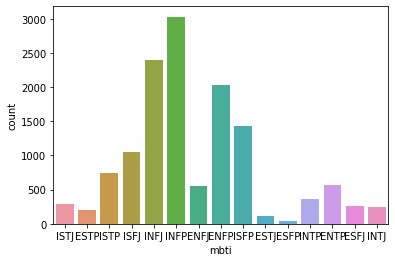

In [79]:
sns.countplot(x='mbti', data=pd.concat([data, data2]))

In [80]:
len(pd.concat([data, data2])['mbti'].unique())

15

In [82]:
pd.concat([data, data2])['mbti'].value_counts()

INFP    3031
INFJ    2396
ENFP    2025
ISFP    1432
ISFJ    1051
ISTP     738
ENTP     562
ENFJ     558
INTP     366
ISTJ     285
ESFJ     263
INTJ     249
ESTP     201
ESTJ     112
ESFP      48
Name: mbti, dtype: int64

In [77]:
data2.to_csv('data2.csv', index=False)

In [84]:
df.loc[df['Instagram'] == 'hyunah_aa']

,No,Grup,Nama,Instagram,MBTI,I/E,S/N,T/F,P/J
53,73,-,HyunA,hyunah_aa,INFJ,I,N,F,J


In [87]:
df.iloc[53:].head(10)

,No,Grup,Nama,Instagram,MBTI,I/E,S/N,T/F,P/J
53,73,-,HyunA,hyunah_aa,INFJ,I,N,F,J
54,74,ASTRO,MJ,mj_7.7.7,ENFP,E,N,F,P
55,75,ASTRO,JinJin,ast_jinjin,ENFP,E,N,F,P
56,76,ASTRO,Cha Eunwoo,eunwo.o_c,INFJ,I,N,F,J
57,77,ASTRO,Moonbin,moon_ko_ng,INFP,I,N,F,P
58,78,ASTRO,Rocky,p_rocky,ESFJ,E,S,F,J
59,79,ASTRO,Sanha,ddana_yoon,ESFJ,E,S,F,J
60,80,BTS,RM,rkive,ENTP,E,N,T,P
61,81,BTS,Jin,jin,INTP,I,N,T,P
62,82,BTS,Suga,agustd,ISTP,I,S,T,P


In [88]:
df = df.iloc[53:].reset_index(drop=True)

In [89]:
df.head()

,No,Grup,Nama,Instagram,MBTI,I/E,S/N,T/F,P/J
0,73,-,HyunA,hyunah_aa,INFJ,I,N,F,J
1,74,ASTRO,MJ,mj_7.7.7,ENFP,E,N,F,P
2,75,ASTRO,JinJin,ast_jinjin,ENFP,E,N,F,P
3,76,ASTRO,Cha Eunwoo,eunwo.o_c,INFJ,I,N,F,J
4,77,ASTRO,Moonbin,moon_ko_ng,INFP,I,N,F,P


## start data 3

In [90]:
# user_caption = {}
data3 = pd.DataFrame(columns=['caption', 'user', 'mbti'])
for i in df['Instagram']:
    print('scraping for @' + i)
    Username = i
    profile = instaloader.Profile.from_username(L.context, Username)
    posts = profile.get_posts()
    caption = []
    if os.path.exists('kpop/'+profile.username):
        shutil.rmtree('kpop/'+profile.username)
        os.mkdir('kpop/'+profile.username)
    for index, post in enumerate(posts, 1):
        L.download_post(post, target=f"{profile.username}_{index}")
        shutil.move(f'{profile.username}_{index}', f'kpop/{profile.username}/{profile.username}_{index}')
        for root, dirs, files in os.walk(f'kpop/{profile.username}/{profile.username}_{index}'):
            text = ''
            for file in files:
                if file.endswith('.txt'):
                    with open(os.path.join(root, file), 'r', encoding="utf8") as f:
                        text += f.read()
            caption.append(text)
    df_caption = pd.DataFrame(caption, columns =['caption'])
    df_caption['user'] = i
    df_caption['mbti'] = df.loc[df['Instagram'] == i,'MBTI'].values[0]
#     user_caption[i] = df_caption
    data3 = pd.concat([data3, df_caption])
    data3 = data3.reset_index(drop=True)
    data3 = data3[data3['caption']!='']

scraping for @hyunah_aa
[예쁘게 찍어주셔서 감사합니다📸🖤🖤🖤✨] 
[🧡🧡🧡🧡] 
[🎨🖌] 
[🖤🤍] 
[🤍] 
[고마워🤍🤍🤍🤍] 
[🖤🖤🖤🖤] 

[🖤💖] 
[🤍] 
[☀️] 
[감사합니다🧚🏻‍♀️💞] 
[🖤] 
[펌 펌 펌] 
[🍶] 
[💙] 

[🌙🤍] 
[감사합니다.] 
[🖤] 
[✂️] 
[맘에들어 쿨해] 
[고마워 언니🤍🤍🤍소중해💞] 


[🍷] 
[🤍] 
[💞] 

[☀️☀️☀️💦] 
[🦋] 

[인스타 만들자 청하야!!!🥰이렇게 이쁜데!!!!!!!!!] 
[감사합니다 정말 여전히 관심주시고 따뜻하게 아껴주시고…] 
[고마워 귀엽다🤍🤍🤍] 

[자기의 자기라고 자기껀 아니야🤷‍♀️] 

[짜잔🧚🏻‍♀️✨] 
[나빌레라🧚🏻‍♀️✨] 
[✨완 전 스 포 나 도 몰라 몰라🤭✨] 
[짠✨] 
[😭😭😭😭] 
[스포🤍🤍🤍🤍] 
[🤭🤭🤭] 
[귀여워 귀여워💖🤍💖🤍✨] 
[🗝] 
[💞] 
[🍭🍭🍭🍭] 
[🍬🍬🍬] 
[🖤🤍. @LOEWE @Jonathan.Anderson…] 
[🍅🍅🍅🍅🍅] 
[☀️☀️☀️] 

[🖤🤍] 

[🌳🌳🌳] 

[도착🤍🤍🤍] 
[🕶] 
[로에베 예뻐 예뻐❤️❤️❤️😘] 
[☀️☀️☀️] 
[😉❤️] 
[🫐🍒] 
[☁️☁️☁️] 
[🍒🍒🍒스포✨] 
[던아 열심히 준비한무대 맘껏 즐기고 행복하게 무대해줘…] 
[자켓촬영💞💞💞] 
[스포🤍🤍🤍] 
[스포🖤🖤🖤] 
[💅] 
[스포!  짠✨] 
[📸🔥🔥🔥🔥] 
[광고🤍🤍🤍🤍. #스탠드오일 #츄비백 👜✨] 
[🌻🌻🌻] 
[💛💛💛💛💛💛] 
[많이 많이 축하해 주고 예뻐해줘서 늘 고맙고 감사합니…] 

[📸] 
[👫💞✨] 
[🌹🌹🌹] 
[✨] 
[💙💙💙💙] 
[🎨🎨] 
[🖤🖤🖤🖤] 
[Fresh air with @LOEWE Photogr…] 
[🎨] 
[🎧] 
[고마워요 모두 감사합니다🔥🔥🔥🤍🤍🤍🤍🤍✨🧚🏻‍♀️] 
[☀️🤍👖] 
[🍑🍑✨] 
[🧚🏻‍♀️🧚🏻‍♀️🧚🏻‍♀️] 
[✨] 
[💞💙💞💙] 
[🤍🤍🤍] 
[💙💙💙💙💙💙💙] 
[💞💞💞💞] 
[#광고  #YPROJECTXFILA 🤍🤍

[#푸마 #DoYou #푸마트레이스😱💕] 
[#푸마 #DoYou #푸마트레이스 😱💕] 
[#푸마 #DoYou #푸마트레이스 💕😘] 
[💇] 
[💇] 



[@mmarymmarymmary] 
[🤔] 

[@somin_jeon0822] 


[💕] 

[우리 스물일곱 올해도 건강챙기면서 행복하자🤘사랑해 친…] 
[Happy new year!!!🤗💋우리 올해도 몸도 …] 
[👀💋] 
[❤️] 
[🙏🙏🙏] 
[#오늘의패션의완성은레오파드 #자세히보면3명 #펜타곤 …] 
[선배님 정말 존경합니다🙏🙏🙏💜💜💜💜] 



[👓] 
[더 보고싶다고해서🤔일분만 올릴수있뎅🤗] 
[첫 연습!] 


[🤗] 


[고마워🤗☺️💕푹자🌙🌙💤] 
[언제더라🤔한달전???암튼 우리 내일또봐🤗💋] 
[고마워요🤤🤗💕💕오늘 뮤직뱅크 첫방송! 빨리만나💋] 
[💋] 
[☃️] 
[진짜요????!!감사합니다😱😱😱😱😱😱💕💋💋💋] 
[과메기🤤🤗] 
[짠🤗#HyunA #현아 #Lip_N_Hip #립앤힙💕…] 
[정말 고마워💕하루하루 행복하게 열심히할게 #아잉 #고…] 
[HyunA Thanx Single [Lip & Hip…] 
[HyunA Thanx Single [Lip & Hip…] 
[정말 고맙고 감사해요💜10주년 마무리 가장 좋아하는 …] 
[HyunA Thanx Single [Lip & Hip…] 
[HyunA Thanx Single [Lip & Hip…] 
[HyunA Thanx Single [Lip & Hip…] 
[제 정신 아닌듯해🤤🤔💋HyunA Thanx Singl…] 
[HyunA Thanx Single [Lip & Hip…] 
[HyunA Thanx Single [Lip & Hip…] 
[HyunA Thanx Single [Lip & Hip…] 
[HyunA Thanx Single [Lip & Hip…] 
[더는 #감추지않아 🤤🤗💋] 
[12월4일 우리 곧 또 만나요💋] 
[#코스모폴리탄 #12월호 🍔🌭🍟] 
[#코스모폴리탄 #12월호 ❤️] 
[#코스모폴리탄 #12월호 📷💕] 

[👟👟

[👯] 
[뭐 마실까요🙆🙅] 
[👯고마워요❤️] 
[감사합니다☺️💜] 


[🙆] 

[누구꺼오송송?👓] 
[흔들흔들 언니오빠 멋쟁이👍] 

[언니 러블리해👯💜] 
[😌🌙⭐️] 

[🚗붕붕붕🙋❤️] 

[👯👯] 
[☺️👏👏👏👏] 
[뿅🙋💜] 































[🍔🍔🍔🍔🍔] 



[🍋🍋🍋🍋] 

[🍎🍎🍎🍎🍎🍎🍎🍎🍎🍎🍎🍎🍎🍎🍎🍎🍎🍎🍎🍎🍎🍎🍎🍎🍎🍎🍎🍎🍎🍎] 

[같이 들어요🎶] 
[🍋🍋🍋] 
[🍅🍅🍅🍅] 
[🙋🙆💜] 
[그만해 손아🙅] 


[☺️] 
[🍻🍺👩‍👩‍👧] 



[아유~~~~맛있어요🙆] 
[당근 맛있어☺️] 



[동물원 좋아요❤️] 
[빨개요] 
[🍨🍧🍦] 
[🙈] 
[다 먹어버렸다 전부다🙈] 
[양대창] 
[양밥 부추된장] 
[전복] 



[🍁] 
[🍴] 
[🌙] 


[손 냠냠😻] 
[✈️우와~~~~안녕하세요!!🙈] 
[보라색😈💜] 
[Love U 고마워💜🙆] 
[미안해 고마워😂😂😂] 


[👩‍👩‍👧] 
[캡틴큐 상민오빠 생일축하드려요. 감사해요 생일에도 함…] 




[👣] 
[주인을 찾아요 슈퍼마리오 잃어버린 아가는 너무 슬프겠…] 
[귀여워😻] 



[머리 많이 자랐다🙈] 





[👭] 
[냠냠☕️] 
[📷] 
[이뿌게 찍어주셔서 감사합니다☺️❤️] 
[이뿌게 찍어주셔서 감사합니다🙆💜] 
[🙋] 
[💋] 
[☺️] 

[💜🙆👍] 
[☺️] 

[눈 싸 움 ⛄️] 
[사랑스러워😂☺️] 

[🎂] 
[🌻] 
[우리효정샘 생일 축하드려요. 사랑해요💜🙆🍰🎉🎁🎂] 
[🍹] 
[🍹] 







[가을이다🍂🍁] 
[☺️] 


[항상 고맙고 사랑해❤️] 
[👍] 
[👭효정샘 수고하셨어요. Love U💜] 
[❤️] 
[🙋수고하셨어요 모두 고맙고 감사해요.] 



[💜] 
[🍹고마워요. 시~~~~~원하다💜] 


[👭] 
[😭🍤🍗🍚🍜] 
[👣🌵🌵🌵] 
[보라보라💜] 






[배부르다 🍕🍕🍕👍🙆] 



[이번에도 넘 예쁘다💜🙆sjyp] 













[아이 예뻐💜] 



[🍦🍇]

[입김이 분명 나왔었는데... #차수호] 
[#louisvuitton @louisvuitton #광고] 
[@wkorea #LoveYourW] 
[#여신강림 #촬영중 🍂] 
[😼] 
[#여신강림 #이수호 #차수호] 
[우리 수호! 수호하러 판타지오에서 WHAT 수호! 😋👍] 
[어추어추🤧🤧] 
[신인모델 차은우😋] 
[@louisvuitton #LouisVuitton #…] 
[#여신강림 #이수호  👍] 
[🍁] 
[#LoveYourW @wkorea] 
[딩가딩가~] 
[촬영중에 잠깐] 
[안녕 🐈] 
[🙉] 
[CHIC 10월] 
[🌝] 
[꿈같은 알람 🏠🤵  🎼  🎬] 
[👍] 
[지나가다가🙂 #2xu #광고모델] 
[바다가 보이는 마을🏡] 
[문빈&산하 차이링👍] 
[#광고 @louisvuitton #LVVOLT] 

[@kindmagazinecn] 
[👓🐮] 
[따나랑🎮] 
[b컷] 

[@esquire.korea @louisvuitton] 
[Thank u kaws🌌] 

[🎥] 


[#1stlook 👶👦] 
[✌️] 
[집사부일체 본방🔫] 
[안녕하세요, 차은우입니다.  이승기 선배님에 이어 뜻…] 
[D-day 4] 
[어추어추🤧] 

[Gateway⛵️] 
[Gateway⏳] 
[Favorite cut + b cut @cartier…] 
[@marieclairekorea 5월호 #Clashd…] 
[생일 축하해주신 모든 분들 감사합니다❤️ 엄마 아빠 …] 
[😙😙] 
[🛁🏀📺] 
[🍹] 
[☺️☺️] 

[One&only] 

[4th] 
[Favorite cut  @dazedkorea] 

[😋😋] 
[🏀🏀🏀] 
[😽] 
[쁘이] 
[짜자잔] 

[Burano island😁] 
[#sansiro] 



[😙😙] 
[#핸섬타이거즈  D-day 🏀🏀] 
[Starry Night 🎹] 

[Happy New Year😋 2020 hello👋] 
[2019 bye bye👋  Thank u] 
[너무너무 감사합니다❤️] 

[Happy holidays

[vcut @kimheejune] 
[🏜] 


[☺️] 
[insta gemsung😏] 
[잘 먹었어 맛났어 @jonbatiste] 
[Grammy Awards] 
[@time] 
[Shall we dance?🕺] 
[🕺🕺] 
[가방 드릴까요?] 
[내 죽기 전에 부탁 하나만 해도 되겠소?🧎🏼‍♂️ 에…] 
[김회장👤] 
[끝☺️] 
[Day 3] 
[Day 2] 
[Day 1] 
[사진정리하다가🕴] 
[😵‍💫] 
[🎺🤡] 
[😑] 
[Purple] 

[김연탄 소원 빌었지?  네 소원이 내 소원이다] 

[@coldplay] 
[ㅡㅡ..] 
[@mrbrunomajor A tiring day no…] 
[@emilyinparis 🖤🤍] 


[you make me wanna be a better…] 
[@j_corden @latelateshow] 
[June Christy] 

[Bing Crosby] 
[1921] 
[🧘🏼‍♂️] 
[2020] 
[I think the mood is crazy🤠 @h…] 
[film] 

[🏊🏻‍♂️] 
[⭐x🌴=👏] 
[Hi] 
[tan🖤] 
[😗] 
[🤗] 
[아기공룡 둘리] 
scraping for @jungkook.97

[So happy to hear about the Ar…] 














[재미쓰따 :)] 


[Listen 'Bad Decisions' NOW @i…] 




















































scraping for @kimjuncotton
[수호가 수호했다 また会いましょう。約束🤙 WE ARE …] 
[EXO-L また明日ね😗] 
[🐈‍⬛🐕‍🦺🚇] 
[나의 해방일지🌦🐢] 
[I stopped by on my way home. …] 
[I had a great time in Austral…] 
[Tokyo 이모저모 See you soon!!] 
[Let’s go EXO✌️🫰] 
[ひさしぶりですね Tokyo!!💓] 
[🏃🏻‍♂️3•2•

[대만에 있는동안 두번이나 1위를 시켜주다니!! 고마워…] 
[#EXOluxion #taiwan] 
[우왘!!!!! 럽미롸잇 첫번째수상!! 감사합니다여러분…] 
[#Tenderlove] 
[#잠못드는밤에] 
[#classic] 
[차트 거~~~~~의 낮져밤이급😆] 
[후다다다닥!! 오늘너무재밌었어요!! 응원소리가 날로커…] 
[누나뿐이였던 나에게 형이생겼다..😆 저도 사랑해요 큰…] 
[연습실에서 듣던노래 #서울의달 @baekhyunee_…] 
[지니따라 베시시😊 #용마랜드] 
[After 3 hours #lovemeright] 
[핸드폰 카메라로 별을 찍다니!!! 사실 유치원때까지만…] 
[오잉????? 이상한 영상 올리고있다가 보니깐 벌써 …] 
[헐크를 마주한 세훈이ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ담에또찍어야지!!] 
[아이언맨 빙의된 백현잌ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ] 
[ㅋㅋㅋㅋㅋㅋㅋ우와~~토르야~~~~~] 
[가상현실 체험중인 카잌ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ#기어VR] 
[엑소엘 너무 빛이나서 화면에 4분의 1을 채웠네..🙈…] 
[우와아아아아아아아아아 진짜 생각치도못한 학교후배를 만…] 
[번쩍번쩍!!! 재밌겠다내일!!😊 #드림콘서트] 
[항상 멤버들만 생각하고 고생이많은 김 고생씨 생일축하…] 
[한 8000장쯤 더올리고싶지만 그렇다면 나를 팔로우한…] 
[다된 건물사진에 찬열뿌리기] 
[다된 세훈이사진에 찬열뿌리기] 
[결과물..에펠탑은 무슨..] 
[내가 에펠탑처럼 나오게 사진찍어줄께] 
[사진에 집중을 하란말이야!!😠] 
[회전목마에 집중을 하라니깐!?!!? #후지큐] 
[세상에서 제일 빠른 제트코스터!! 도돈파!! 타지못해…] 
[전화하지말고 회전목마에 집중하란말이야!!!! #첫일본…] 
[드디어 만난 쌍둥이 서언이 서준이!!! 얘들아아아아 …] 
[백현아~~~~ 생일축하한다!!!!🎂🎁🎉🎊 어서와 공식…] 
[오늘도 4주연속 1위를 했습니다!! 엠씨보느라 정신없…] 
[!?!?!?!?!? 뮤뱅보다가 깜놀....역시 엑소엘…] 
[자장가] 
[호잇!! #아주

[#Hongkong] 
[진정이란이런거 . 좋아해 많이아껴요] 
[😁] 
[춥다..입까지지퍼올리세요 ☺️] 





[ありがとうございます. おつかれさまです 👏🏻👏🏿 そして…] 
[Halloween)🎃] 
[좋네좋다좋아👍] 
[자폭] 
[이쁘네.非常美.きれい.] 

[불라!!!!!!!!!!!] 

[😴] 
[가족들과좋은저녁되세요👨‍👩‍👧‍👦] 
[EXO-L 🙏👏🏻❤️ 감사합니다!] 

[C+1] 
[🙏] 
[EXO-L오늘따라보고싶네  최고야 짱이야  고마워요 …] 
[EXO] 
[+L❤️] 
[🎆🎉💥] 
[새벽공기가좋네요여러분] 
[🌌] 


[#영남루] 
[#밀양] 

[모두화이팅] 

[👏🏻@ithk] 
[🐻] 
[- 유니세프는 이번 지진으로 큰 고통에 놓인 네팔 어…] 
[Win!👏🏻👏🏻] 

[고마워요여러분EXO-L🙈] 
[#Vietnam] 
[😬BH] 

[#부소산] 
[도라에몽👼#NEWERA] 

[이것은무엇일까요? 흐흐] 
[Dutchcoffee💯#부나플러스] 
[소셜포비아3월12일 안보면 후회해요 난리나요] 
[✨] 
[집에들어올생각하지마 나도싫어] 
[🙏] 
[⭐️] 

[Very like] 
[2015 global audition is start…] 
[#London] 
[2014년은 참많은생각을 하게 하는 한 해였습니다. …] 
[👏] 



[Thank U#s**tkingz] 
[😅] 

[🌕] 
[👍] 
[우리D.O.#카트OST 👏] 
[#busan] 
[Hhahahahaha] 
[SBCDKS#inMEXICO..XLCT#inKOREA] 
[ST] 
[Exo-l 사랑해] 
[👊‼️] 
[🌻] 
[브이이] 
[브이] 
[사랑해] 
[👀] 
[#렉걸려.... 그래도 너무재미있다 다음에 또 만나요] 
[Friend] 
[Happy birthday lay!! #EXO-L] 
[#TOKYO] 

[🙌🙌] 
[With lay xiumin] 
[With tao suho] 

[Kkkkkkkkkk] 
[She so high!! @beatburgerjae

[Jus2 MINI ALBUM <FOCUS>  TRAC…] 
[Jus2 MINI ALBUM <FOCUS>  TRAC…] 
[Jus2 MINI ALBUM <FOCUS>  TRAC…] 
[Jus2 MINI ALBUM <FOCUS>  TRAC…] 
[Jus2 MINI ALBUM <FOCUS>  TRAC…] 
[Jus2 MINI ALBUM <FOCUS>  TEAS…] 
[Jus2 MINI ALBUM <FOCUS>  TEAS…] 
[Jus2 MINI ALBUM <FOCUS>  TEAS…] 
[Jus2 MINI ALBUM <FOCUS>  TEAS…] 

[재범입니다 여러분 잘 지내시나요 2019도 벌써 한달…] 
[JB (GOT7) <연애하루전 시즌 ZERO> OST…] 
[한번더. #5YearsWithGOT7 #5YearsW…] 
[5.] 
[잘지냅니다.] 
[@bambam1a] 
[모두들생일축하해주셔서감사합니다.🤘🏼🤘🏼🤘🏼🤘🏼] 
[📷: @w_n_r00  2018.] 
[📷 2018.] 
[Merry christmas🎄  다들고맙습니다 고생했…] 
[📷] 
[📷] 
[자찍습니다 핫둘핫둘] 

[Read.] 
[Miracle. 안보여. GOT7 ØFFSHORE🌊] 
[2014년 겨울 모든 기억과 추억들을 뒤로한 채  아…] 
[🎣] 
[🤙🏻] 
[🎞] 
[🎞] 
[🎞] 
[🎞] 
[🎞] 
[🎞] 
[🎞] 
[🎞] 
[🎞] 
[🎞] 
[🎞] 
[🎞] 
[🎞] 
[🎞] 
[🎞] 
[저번에] 

[GOT7 3rd Album <Present : YOU…] 
[GOT7 3rd Album <Present : YOU…] 
[저번에] 

[🎞] 
[🎞] 
[🎞] 
[🎞] 
[📸: @pepi_jy_] 
[🎞] 
[🎞] 
[🎞] 

[생일축하감사함당🤘🏻🔥👍🏻] 
[꿈을꿨다.  2017.] 

[🤘🏻] 
[🎞] 


[슝] 



scraping for @marktuan
[Houston D2 was 🔥!!] 
[SAN ANTONIO YOU WERE AMAZING!…] 
[💞] 
[Amaz

[............ D-2.  Challenge …] 
[.......... 점심 데이트 @benballer …] 
[............... D-3. Break aw…] 
[....................... D-4. …] 
[D-5. No matter the results, a…] 
[........................ D-6.…] 
[.............................…] 
[Solo Artist 로서 처음 MTV special…] 
[제가 왜 항상 근욕 자랑하는지 알겠어요... 아버지 …] 
[아들 로서 여태까지 한번 도 엄마 아빠 한태 요리 해…] 
[ELLE 🙏  #jacksonwang #잭슨 #王嘉爾…] 
[너무 오래만이다 우리 집 ㅠ 돌아다녀봤는데 많이 많이…] 
[Team Wang。 열심히 해서 더 멋진 잭슨 보여드…] 
[.............................…] 
[VOGUE China .................…] 
[Fendi Man 될수있어서 감사해요 영광이에요 🙏❤…] 
[.............................…] 
[Team Wang & Team Swag 🙌 @kaz_…] 
[Team Swag & Team Wang Collabo…] 
[나와 함께 힘든 시간 보내왔고 슬플때 행복할때 항상 …] 
[❤️ #jacksonwang #잭슨 #王嘉爾] 
[-----------------------------…] 
[-----------------------------…] 
[My Dearest Mom happy birthday…] 
[사랑하는 우리 엄마 생일축하해요!!! 🎂🎁🎊🎈🎉 제 …] 
[뭐해용? 저 일 끝났어요 ~ 🎤지금 가서 씻어야지 🛁…] 
[First time in Australia !! Ca…] 
[Today is my birthday and I'm …] 
[너무 오랜만이에요! 벌써 1년이 또 지났어요. 벌써 …] 
[Shanghai 집으로 돌아갈때마다

[NYC❤️🗽] 
[Thanks to my friend @nusr_et …] 
[Good Friends🙌🏻 Good Memories …] 
[LA Good To Be Back❤️ @randywo…] 

[컵케이크!❤️ 우리 막내딸 Cupcake❤️ our …] 
[WAKANDA FOREVER] 
[Worldwide DAB🌎] 
[AIS NEXT G PECK x BAMBAM let’…] 
[Snap the finger] 
[GREEN OCEAN (comment this “💚” )] 
[เขิน☺️ @chomismaterialgirl] 
[Just a little test for you gu…] 
[allure korea #bambam] 
[Family❤️ @oxbeerxo @c_bhuwaku…] 
[GOT7 NEW ERA is OUT! Go Check…] 
[2틀 동안 넘 감사합니다! 이제 내일 서울 마지막이네…] 
[Thank You so much for wishing…] 
[🍷] 
[ART🍷] 
[รอบหน้าไม่ต้อง กลัวพี่แล้วนะ …] 
[สุขสันต์วันสงกรานต์นะครับ❤️💐 …] 
[GQ cover] 
[Are you ready to Stay on me? …] 
[대뷔 축하해 내 친구🙌🏻 @realstraykids] 
[Happy Birthday Jackson!🎉 Wish…] 
[เห็นกันหรือยังครับ? Vivo ทั่ว…] 
[😂😂] 
[우리 아가새 여러분❤️ 오랜만에 1위 받아보니까 기분…] 
[Vivo V9  Finally OUT!🙌🏻 อย่าล…] 
[가편집 연습 버전!] 
[GOT7 Studio “LOOK” Edit by. B…] 
[오늘 응원하러와준 THE8!! And MC민규 ㅋㅋ …] 
[mood] 
[LOOK✨] 
[EYES ON YOU #GOT7] 
[❄️] 
[mood] 
[귀요미들❤️] 
[💕푸딩] 
[❤️ #TheReturnOfSupermanTH #li…] 
[4Years With GOT7❤

JSON Query to graphql/query: 429 Too Many Requests [retrying; skip with ^C]
Number of requests within last 10/11/20/22/30/60 minutes grouped by type:
                              other:    0    0    0    0    0    0
                             iphone:    7    7   15   19   25   26
 * 003056d32c2554def87228bc3fd9668a:  174  188  354  386  526  974
Instagram responded with HTTP error "429 - Too Many Requests". Please
do not run multiple instances of Instaloader in parallel or within
short sequence. Also, do not use any Instagram App while Instaloader
is running.
The request will be retried in 8 seconds, at 13:45.
JSON Query to graphql/query: 429 Too Many Requests [retrying; skip with ^C]
Number of requests within last 10/11/20/22/30/60 minutes grouped by type:
                              other:    0    0    0    0    0    0
                             iphone:    7    7   15   19   25   26
 * 003056d32c2554def87228bc3fd9668a:  174  186  353  384  525  975
Instagram responded with HTT

ConnectionException: JSON Query to graphql/query: 429 Too Many Requests

In [91]:
data3.shape

(6744, 3)

In [92]:
data3.tail()

,caption,user,mbti
6781,"Odd Eye 👀 ""my eyes were looking for you""\n",bambam1a,ESTJ
6782,🌈\n,bambam1a,ESTJ
6783,hahahaha I broke it\n,bambam1a,ESTJ
6784,มีความสุขจริงๆ❤️ รักนะครับ!\n,bambam1a,ESTJ
6786,@pepi_jr with ma boy Jr.형!🍑\n#mcountdown\n,bambam1a,ESTJ


<AxesSubplot:xlabel='mbti', ylabel='count'>

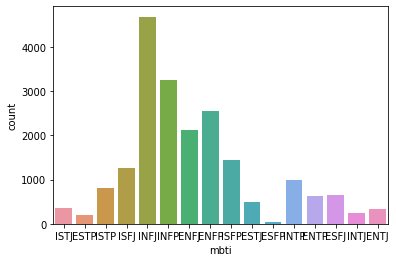

In [93]:
sns.countplot(x='mbti', data=pd.concat([pd.concat([data, data2]), data3]))

In [94]:
data3.to_csv('data3.csv', index=False)

In [97]:
import matplotlib.pyplot as plt

[Text(0, 0, 'ISTJ'),
 Text(1, 0, 'ESTP'),
 Text(2, 0, 'ISTP'),
 Text(3, 0, 'ISFJ'),
 Text(4, 0, 'INFJ'),
 Text(5, 0, 'INFP'),
 Text(6, 0, 'ENFJ'),
 Text(7, 0, 'ENFP'),
 Text(8, 0, 'ISFP'),
 Text(9, 0, 'ESTJ'),
 Text(10, 0, 'ESFP'),
 Text(11, 0, 'INTP'),
 Text(12, 0, 'ENTP'),
 Text(13, 0, 'ESFJ'),
 Text(14, 0, 'INTJ'),
 Text(15, 0, 'ENTJ')]

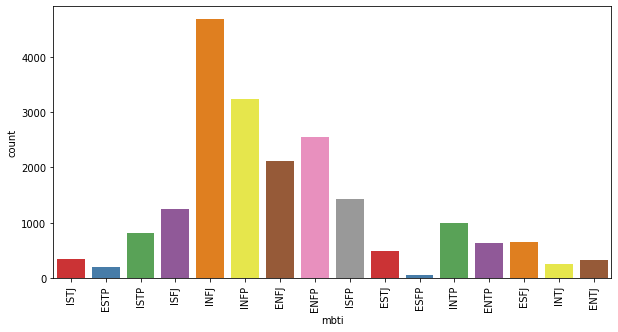

In [99]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=pd.concat([pd.concat([data, data2]), data3]),
    x='mbti',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

In [100]:
df.loc[df['Instagram'] == 'yugyeom']

,No,Grup,Nama,Instagram,MBTI,I/E,S/N,T/F,P/J
25,98,GOT7,Yugyeom,yugyeom,ENFJ,E,N,F,J


In [101]:
df.iloc[25:].head()

,No,Grup,Nama,Instagram,MBTI,I/E,S/N,T/F,P/J
25,98,GOT7,Yugyeom,yugyeom,ENFJ,E,N,F,J
26,99,iKON,Jay,gnani_____,ISFP,I,S,F,P
27,100,iKON,Bobby,bobbyindaeyo,INFP,I,N,F,P
28,101,iKON,JUNE,juneeeeeeya,ENFP,E,N,F,P
29,102,iKON,Song,sssong_yh,ENFJ,E,N,F,J


In [102]:
df = df.iloc[25:].reset_index(drop=True)

In [103]:
df.head()

,No,Grup,Nama,Instagram,MBTI,I/E,S/N,T/F,P/J
0,98,GOT7,Yugyeom,yugyeom,ENFJ,E,N,F,J
1,99,iKON,Jay,gnani_____,ISFP,I,S,F,P
2,100,iKON,Bobby,bobbyindaeyo,INFP,I,N,F,P
3,101,iKON,JUNE,juneeeeeeya,ENFP,E,N,F,P
4,102,iKON,Song,sssong_yh,ENFJ,E,N,F,J


## start data 4

In [105]:
# user_caption = {}
data4 = pd.DataFrame(columns=['caption', 'user', 'mbti'])
for i in df['Instagram']:
    print('scraping for @' + i)
    Username = i
    profile = instaloader.Profile.from_username(L.context, Username)
    posts = profile.get_posts()
    caption = []
    if os.path.exists('kpop/'+profile.username):
        shutil.rmtree('kpop/'+profile.username)
        os.mkdir('kpop/'+profile.username)
    for index, post in enumerate(posts, 1):
        L.download_post(post, target=f"{profile.username}_{index}")
        shutil.move(f'{profile.username}_{index}', f'kpop/{profile.username}/{profile.username}_{index}')
        for root, dirs, files in os.walk(f'kpop/{profile.username}/{profile.username}_{index}'):
            text = ''
            for file in files:
                if file.endswith('.txt'):
                    with open(os.path.join(root, file), 'r', encoding="utf8") as f:
                        text += f.read()
            caption.append(text)
    df_caption = pd.DataFrame(caption, columns =['caption'])
    df_caption['user'] = i
    df_caption['mbti'] = df.loc[df['Instagram'] == i,'MBTI'].values[0]
#     user_caption[i] = df_caption
    data4 = pd.concat([data4, df_caption])
    data4 = data4.reset_index(drop=True)
    data4 = data4[data4['caption']!='']

scraping for @yugyeom

[TTFU🔥- @longlivesmdc    @satg…] 
[🌞🐥🐕] 
[☀️☀️☀️] 
[Thank you😁 @onitsukatigeroffi…] 
[[사이먼 도미닉 (Simon Dominic), 로꼬 …] 
[🎤🎙🎧] 
[푸리스타일🕺] 
[🌕🌕🌕☺️] 
[마지막 아깝🕺] 
[🎧🎤] 
[고생했다이 화이팅 브로🔥🔥🔥] 
[둥~ 탁!🕺  #dance #freestyle] 
[⭐️] 
[🇹🇭😁] 
[🇹🇭💚🐥😊] 
[[유겸 (YUGYEOM)] YUGYEOM 1st Li…] 
[🫶] 
[🇹🇭💚😊] 
[Thank you🇵🇭😁] 
[푸리스타일🕺🕺🕺 #freestyle #dance] 
[친구들과 함께 😁] 
[🎤🐥💚 Photo by @djwegun  😁] 
[[유겸 (YUGYEOM)]😁😁😁🔥🔥🔥 YUGYEOM …] 
[💶💶💶 Cash in Cash out🤑] 
[[유겸 (YUGYEOM)] YUGYEOM LIVE I…] 
[[유겸 (YUGYEOM)]💚🔥🐥 YUGYEOM 1st…] 
[로꼬형 소금누나랑😁 1팀 희진누나 결혼 축하드립니돠🎉🙌] 
[🕺🕺🕺댄스댄스] 
[[유겸 (YUGYEOM)]🇹🇭💚💚💚 YUGYEOM 1…] 
[💇🏻🧑🏻‍🦱🐧 머리했는데 어때유? @longlives…] 
[Wegun is my DJ 형🔥🔥🔥] 
[[YUGYEOM Europe Tour 2022] 유겸…] 
[🕺🕺🕺] 
[보고있나 @jinyoung_0922jy  IGOT7🟢🟢🟢] 
[OUT NOW🐥🔥🔥🔥💚] 
[💚🐥] 
[🐥💚] 
[IGOT7+GOT7 💚🌍🐥] 
[[YUGYEOM Europe Tour 2022] 유겸…] 
[#igot7❤️🐥] 
[[유겸 (YUGYEOM)] 유겸 (YUGYEOM) -…] 
[IGOT7] 
[솔직히 너무 이쁜거 아닌가!!🤔💚💚💚 유겸 (YUGY…] 
[[유겸 (YUGYEOM)] 유겸 (YUGYEOM) -…] 

[GOT7 EP [GOT7] Concept Photo …] 
[Thank you London💙❤️🤍🇬🇧 Thank …] 

[#비행기타고가요시즌2 #비타크루#오늘밤8시20분#본방…] 
[#arenakorea] 
[#iDECIDE#비하인드] 
[#인기가요#너.바.따] 
[#우리나니형생축!!] 
[#iKON#iDECIDE#감사합니다🙏] 
[곧 만나요 코닉이들~!!] 
[#갈수록재밌어진다#비행기타고가요2] 
[#비행기타고가요2 #형님들Vv] 

[#iKON#iDECIDE] 
[#iDECIDE#iKON] 
[🌸] 
[#가족사진] 
[#비하인드컷📷] 

[#사랑하는동생아생축!!] 
[#이번투어도행복했다#감사합니다🙏 아이코닉!!] 
[#📸] 


[출국] 
[⚫️] 

[생축지원!!사랑한다~!!] 
[#비행기타고가요2#내일첫방!!] 



[#🐅] 
[#photoby제성이형] 
[#블라디보스톡 🥶] 

[#🙃] 
[#niveamen] 
[#가오슝#airbusan #비행기타고가요] 
[#곧크리스마스🎄] 

[#in가오슝] 
[#비행기타고가요#안녕하십니까#airbusan✈️] 
[기다림~📷] 
[⚫️⚪️] 
[🖤💚] 

[#🍂] 
[63노을] 
[#iKON] 
[#요즘많이듣는노래#끄덕끄덕] 
[#할로윈VLOG#피곤한송커] 
[#happyhalloween#송커&지난나시] 
[이때 진짜 말랐었네 ㅋㅋㅋ#사진첩] 
[#현웃터짐ㅋㅋㅋ] 
[🍂#🍭] 
[⭐️] 
[#1년전쯤?] 
[inJEJU] 
[우리 태림이형 결혼 축하드려요!!!ㅎㅎ#결혼식은언제나뭉클] 
[#여주#경비행기✈️ #소소한vlog] 
[#Baliswing] 
[#inBali] 
[#🙈🙉👋] 
[#bali #vacation🌴] 
[#와디님잘신을게요!!#감사해요☺️] 
[#멍~] 
[⬛️] 
[#저세상각도] 
[#🙂] 
[#inLA#🌊] 
[#hollywood #inLA] 
[#backstage] 
[#🌳] 
[#💦] 
[long time no see] 
[#누구없소#비하이화이팅!!:)] 
[#vogue #6월호] 
[#도산분식압구정#맛집#잘먹었습니다!!:)] 
[#iKON #아이콘 #VOGUE #VOGUEKOREA…] 
[#위너형들#화이팅!

[Now,보그싶쇼,민혁 Thanks:)💙] 

[It was a good time 😆] 
[빽투아 시즌2까지 고생많으셨습니다! 막방까지 지켜봐준…] 
[귀여운곰? 널한입bear물겠다 #gentlemonst…] 

[😈😇 #lofficielhommes #ykedition] 
[다시만난 리모와☺️] 
[무사귀가하겠습니다!] 
[살짝 맛만 보고 기대해주세요 😏 @lofficielh…] 
[K-pose🐶] 
[New friend :)] 
[저는 민초단을 언제나 존중합니다💚  #광고 #에피민트…] 
[챔피온과 함께하게 되었습니다. 챔피온의 첫 뮤즈인 만…] 
[🍯💛] 
[🦋💧] 
[맞혔어야지...#놀토] 
[☺️👍 #아시아프] 
[Burberry TB Monogram collecti…] 
[B💙 #TBMonogram #BURBERRY] 

[🌘] 
[🐋] 
[나와 잘어울려 너란 아이💧#광고 #에비앙 #evian] 
[❤or💚] 
[Blueblueblueblueblue] 
[#CHANELFACTORY5 #샤넬향수 #샤넬넘버5 …] 
[퇴근] 
[퇴근합니다😊 #광고 #Brooks #브룩스러닝 #오로…] 
[Room] 
[🐳💙] 
[💜] 
[주문하신 명곡 나왔습니다.] 
[🐶🐶] 
[역.대.급 #WKorea] 
[즐퇴 (즐거운퇴근)] 
[flavors of love💙] 
[이제부터 사진찍을때 V 아니고 Y] 

[멋진경험goooooood #Ymagazine] 
[언제든 기분을 나아지게하는 사람이되어야지’ㅡ’] 
[🐳] 
[💙인기가요 엠씨 그동안 사랑해주신 모든 분들 감사합니다💙] 
[나도 이제 인싸요] 
[부끄럽구만 #vogue] 

[thanks🥰 #urbandecay #광고] 



[behind🎬] 
[인가도 막방도 고생많았어요 모두들’ㅡ’] 
[🎈] 
[어그래 창균아] 
[입술에뭐가묻었는데요 #lovekilla] 
[마지막은 언제나 아쉽다 #빽투더아이돌] 
[맵스짱짱 #MAPS] 
[✨⭐️💫🌛] 
[빵긋빵긋] 
[coming soon이네요...호이호이] 
[🔥😚🔥 #

[got stung by one of these] 





[ghost cat] 

[to produce and create] 
[fallen angel] 



[@saythename_17 - Sector 17] 
[메종 마르지엘라 부티크 롯데에비뉴엘잠실점 @maiso…] 


[to the sun] 



[SEE YOU SPACE COWBOY…] 


[fantasized artificiality] 
[@saythename_17 - Face the Sun] 
[hold your breath] 

[@omegasapien - Wrecker ft @ve…] 
[just keep swimming] 
[SEVENTEEN (세븐틴) 4th Album 'Fa…] 
[@saythename_17 - Darl+ing] 
[testing…⚠️] 
[#알렉산더맥퀸 #AlexanerMcQueen #McQ…] 
[@charli_xcx - Beg For You (fe…] 
[🐇 🕳] 

[simulated reality] 
[#McQueenTreads #알렉산더맥퀸 #광고] 
[BANDS BOY only on @youtube   …] 

[@voguekorea] 
[@voguekorea] 

[Seoul city, run it up] 
[@saythename_17 - Attacca] 

[SEVENTEEN 9th Mini Album 'Att…] 
[thanks Woo] 




scraping for @woozi_universefactory
[BE THE SUN] 
[‘꿈걸음’] 
[고맙습니다] 
[웜업] 
[Things that I don’t do : smok…] 
[1주년기념 외계어] 
[-멍] 
[?] 

[얜 아직 이름이 없네] 
[🦓] 



[Ruby💋] 
[스피커가 버릇이 없네] 

[🌌] 
[rock with you] 

[🌌] 
[💎✨✨] 
[열정남] 




[🌌] 

[welcome] 
scraping for @jeonghaniyoo_n
[🤭] 
[바다 가기

[22.02.28 오늘하루 즐겁게 보냈고 감사했습니다 …] 
[4회 공연 동안 너무 행복했습니다 판타지를 직접 볼 …] 
[비장한 유태양 입니다👊  뭘 본거야..?] 
[오늘도 와줘서 곰다💚  #온에어#onair] 
[온에어  보러와줘서 고마워 곰다🤍 . 염색 했다.  …] 
[Pretty Clouds] 
[새해 복 많이받으세요🙌] 
[SF9 Forever FANTASY Forever  …] 
[짤쫄이 멋졌다 형들 고생했다] 
[2022.01.23 SF9 LIVE FANTASY #…] 
[SF9 LIVE FANTASY #3 IMPERFECT…] 
[SF9 LIVE FANTASY #3 IMPERFECT…] 
[무보정영상 #Kisskiss] 

[2022 Happy New Year🌞  Practic…] 
[2021년도 고생 많으셨어요👍🏻 돌아오는 새해에는 좋…] 

[How are U today❤️‍🩹] 
[가요대전 멋진무대 여기 주문이요🪄 고생해따!  #가요…] 
[뮤지컬 #알타보이즈 의 ‘후안’으로써 너무 즐겁고 소…] 
[추운 날씨에도 찾아와주시고 좋은기운받고 공연 잘했습니…] 
[#알타보이즈 #유태양#백호#산하#주찬#Y  첫공연 감…] 
[KBS'가요대축제' 감사합니다🤍] 
[2021 KBS가요대축제  본방사수🙌] 
[오늘 새벽 감성 🍑를 낮에 올립니다  #KAI #Pe…] 
[판타지 사랑해요❤️ 1위 너무 고마워요👏🏻 ⠀ 인트로…] 
[#알타보이즈 🔥 후안 입니다👋 2021.12.18(S…] 
[#트라우마 🤍] 
[이틀동안 공연에 와준 판타지들 너무너무사랑해🤍 곰다🙌] 
[함께 무대를 만들어주신 분들 정말 감사드립니다 준비하…] 
[Comeback!🔥 #SF9 #Trauma] 

[12월호  @singlesmagazine] 
[희노애락! 2021.11.27~28(토.일) 봅시다🙌] 
[Comeback!! SF9 ‘RUMINATION’-T…] 
[약속] 
[🎈] 
[그림 좀 그려봤어🎨] 
[Have a nice weekend👋 가을하네요🍁🍂] 
[1년 전 

[#harrystyles - Falling https:…] 
[시즈니픽 인스타감성👍📸] 
[OOTD🤣] 
[꾸러기표정😉] 
[좋아하는 백현이형과 @baekhyunee_exo 노래…] 
[Daily photo📸] 
[Cozzzzzyyyyy🥱] 
[Gray T 👍] 
[요즘 favorite] 
[Cosmopolitan  Last Exclusive …] 
[Cosmopolitan  Exclusive B cut…] 
[Gimme gimme ooh] 
[오늘은 등교날 🏫] 
[지우😁] 
[지우 coming soon] 
[오늘도 엄마랑 즐겁게 놀았다. 🌼] 
[OOTD : 데이트룩 with Mom] 
[Official髭男dism-pretender Cove…] 
[A❤️💚] 
[쟈니형이 준 옷을 입고 정우가 준 목걸이를 하고 웃고…] 
[진심으로 행복했어요. Love dear] 
[Birthday OOTD 🥳] 
[*공지사항*  안녕하세요. 도영입니다!  전해드리고 …] 
[2/1 spoiler 😋] 
[Outfit Of The Day✌️] 
[울엄마는 사진을 참 잘찍어📸] 
[☃️☃️☃️] 
[🏇🧸] 
[📸📸] 
[어서와 2021 👐] 
[2020 잘...가버려!!!!!😷] 
[😁😁😁😁😁😁😁] 
[광고 그런거 아니고 그냥 크리스마스라서 색 맞추고 싶…] 
[인생네컷 📸] 
[In 대기실!] 
[🥴] 
[A🍀☘️🍀☘️] 
[나 약속 지켰다~😙] 
[멋부리기.] 
[Wish came true 🧞‍♂️] 
[📷] 
[웃자😁😁😁] 
[@koreadispatch  찍은날 📷] 
[Blue 🍎] 
[White.] 
[이 사진 📷 에서는 노래 🎤 가 나와요.] 
[From 🏡  B cut] 
[🎁] 
[From 🏡 B cut] 
[From 🏡] 
[From 🏡] 
[FROM 🏡] 
[Profile 📷] 
[daily] 
[⬛⬜] 
[그림 🖼  안에서 노래하기.] 
[Make a wish🧞‍♂️] 
[인스타 맛집 오픈 🎉] 
scraping for @tenlee_1001

[이대리 이

[When I was a kid hhhhhh] 

[🌞] 
[💚ZOO💚] 
[5.20] 
[😲] 
[That’s fun~hhhh] 
[OMG HHHHHHHHHHHHHHH] 
[sup🤪] 
[🥹🫠🫠] 
[Should I cut my hair?🤨] 
[😐] 
[Too lazy to shave😬] 
[Student] 
[우리의 추억!!!!!] 
[🤓] 
[Is a wonderful day 😉] 

[Happy WayV Day 💚] 
[🎣☺️] 
[#zoo] 
[Goodnight 💤] 
[Meow😚] 
[Miracle 😍] 
[Good memories] 
[So cold 🥶] 
[Come catch me if you can #hal…] 
[우산 보다 더 어려운데🤣] 
[4hs 등산~너무 너무 힘들지만 재밌었어요] 
[Coffee time] 
[Hendery~HBD!!!] 
[🤩🥮👍] 
[우리 쿤형 최고야 @kun11xd] 
[Starving] 
[I had so much fun today~u?☺️] 
[너무 재밌다☺️] 
[wow～] 
[Jalapeño will be released on …] 
[Jalapeño 🔥🔥🔥🔥on fire] 
[😎] 
[Sleepy Bella😌] 
[So much fun 🤩] 
[드럼 오랜만] 

[ommmmg 너무 좋아🥺🥺 Family photo] 
[Keep smiling 😊] 
[hihi] 
[my brother 黃金] 
[😛] 
[😐] 
[🟪] 

[우리 Bella] 

[🚴🏻‍♂️🚴🏻‍♂️🚴🏻‍♂️] 
[3 2 1] 
[☺️] 

[How are you 😌] 
[아아 한 컵 ☕️] 
[kick back 🔥] 
[wayvision] 
[😋] 
[귤] 
[ㅋㅋㅋ🥰] 
[ㅋㅋㅋㅋ ☃️☃️☃️☃️] 
[hhhhhhhh] 
[😉] 
[😌] 
[mini snowman ⛄️] 
[🥰🥰🥰🥰🥰🥰] 
[오늘 너무 happy 여러분 도봐요💚 (사진을 성찬이…] 

[work it～] 

[Part 2~] 

[😂😂😂] 
[화이팅🔋] 
[WayVisi

In [106]:
data4.shape

(5312, 3)

In [107]:
data4.to_csv('data4.csv', index=False)

In [109]:
data_all = pd.concat([pd.concat([pd.concat([data, data2]), data3]), data4]).reset_index(drop=True)

In [110]:
data_all.shape

(25373, 3)

In [111]:
data_all.head()

,caption,user,mbti
0,📸\n,suye.on2di,ISTJ
1,제 손이 또...커튼을 망가트리고 말았습니다...\n,suye.on2di,ISTJ
2,Synergy\n,suye.on2di,ISTJ
3,해보자고\n,suye.on2di,ISTJ
4,🌻😁❣️\n,suye.on2di,ISTJ


In [112]:
data_all.to_csv('data_all.csv', index=False)

In [ ]:
data_all